# Replication and Improvement of Machine Learning Study 'Comparison of Machine Learning Algorithms for the Power Consumption Prediction - Case Study of Tetouan city –'

## Abstract

This project aimed to replicate the models used in the article 'Comparison of Machine Learning Algorithms for the Power Consumption Prediction - Case Study of Tetouan city –' by  A. Salam and A. E. Hibaoui as the details and parameters of the model were specified in the original article.

The results to be replicated were Tables II and IV from this paper using various Python modules and discuss the results.

The second aim of this project was to create my own supervised learning model and tune it to outperform the best performing model from the original article.

## Methods

### Pre-processing data:

**Import the dataset and explore it**

In [ ]:
import numpy as np
import pandas as pd

pd.set_option("display.notebook_repr_html", False)  # disable "rich" output

# Read csv file as a pandas DataFrame
data = pd.read_csv("Tetuan City power consumption.csv", comment="#")

data.head(5)

The authors used feature importance to determine the most important features to use for building the model.

Furthermore they also extracted the 'DateTime' feature into additional features to capture the temporal factors that influenced the consumption of power, as a result different attributes of the ‘DateTime’ feature were extracted to be used for the prediction model. 

As a result the features used by the authors as obtained by feature selection as shown in Figure 4 of the experiment are: 'Temperature', 'Humidity', 'Wind Speed', 'General Diffuse Flows', 'Diffuse Flows', Day of Week', 'Day of Year', 'Hour', 'Minute', 'Month', 'Quarter', 'Week of year' and 'Weekday'.

**Convert DateTime into additional features for: day, weekdays, dayofyear, hour, minute, month, quarter and weekofyear.**

In [ ]:
# Convert 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Extract datetime components
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['DayOfYear'] = data['DateTime'].dt.dayofyear
data['Hour'] = data['DateTime'].dt.hour
data['Minute'] = data['DateTime'].dt.minute
data['Month'] = data['DateTime'].dt.month
data['Quarter'] = data['DateTime'].dt.quarter
data['WeekOfYear'] = data['DateTime'].dt.isocalendar().week
data['IsWeekday'] = data['DateTime'].dt.dayofweek.apply(lambda x: 1 if x < 5 else 0)

# Drop the original 'DateTime' column if not needed
data.drop(columns=['DateTime'], inplace=True)

print(data.head(2))

**Include aggregated power consumption feature**

In the original paper the authors also included an 'Aggregated distribution' this was calculated as an average of the power consumption across the three zones.

In [ ]:
# Calculate the average of Zone Power Consumption for each row
data['Average_Zone_Power_Consumption'] = (data['Zone 1 Power Consumption'] + data['Zone 2  Power Consumption'] + data['Zone 3  Power Consumption']) / 3
print(data.head(3))

**Perform Min-Max Normalisation**

Min-max normalisation was performed on the dataset, this was described by the author to be one of the best and most commonly used techniques available. This was not applied to the features extracted from ‘DateTime’ as they have been categorically encoded into numerical values. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your original DataFrame
data_normalized = data.copy()  # Create a copy of the original DataFrame

# Define columns to scale (excluding binary features)
columns_to_scale = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 
                    'diffuse flows', 'Zone 1 Power Consumption', 'Zone 2  Power Consumption',
                    'Zone 3  Power Consumption', 'Average_Zone_Power_Consumption']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to selected columns
data_normalized[columns_to_scale] = scaler.fit_transform(data_normalized[columns_to_scale])

print(data_normalized.head(5))

# Replicating Table II: Models for 10 minute interval Power Consumption

## Random Forest (10 minute intervals)

**Based on the Case Study of Tetouan City the most optimal parameters found for Random Forest are:**

Parameter values:
- Number of trees = 30
- Number of features = 7
- Max depth of tree = None
- Min samples split = 2
- Min sample leaf = 1

Scaling was not used as the algorithm utilises binary splitting at each node.

**Prepare data for modelling**

The original data set was split into testing and training sets using a 25-75% split respectively.

The same split was used for all models in this study.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variables
features = data.drop(columns=['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'Average_Zone_Power_Consumption'])
target_zone1 = data['Zone 1 Power Consumption']
target_zone2 = data['Zone 2  Power Consumption']
target_zone3 = data['Zone 3  Power Consumption']
aggregated_zone = data['Average_Zone_Power_Consumption']

# Split the data into training and testing sets for each target variable
X_train_unscaled, X_test_unscaled, y_train_zone1_unscaled, y_test_zone1_unscaled = train_test_split(features, target_zone1, test_size=0.25, random_state=42)
X_train_unscaled, X_test_unscaled, y_train_zone2_unscaled, y_test_zone2_unscaled = train_test_split(features, target_zone2, test_size=0.25, random_state=42)
X_train_unscaled, X_test_unscaled, y_train_zone3_unscaled, y_test_zone3_unscaled = train_test_split(features, target_zone3, test_size=0.25, random_state=42)
X_train_unscaled, X_test_unscaled, y_train_aggregated_unscaled, y_test_aggregated_unscaled = train_test_split(features, aggregated_zone, test_size=0.25, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the RandomForestRegressor with the specified hyperparameters
rf_zone1 = RandomForestRegressor(n_estimators=30, max_features=7, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_zone2 = RandomForestRegressor(n_estimators=30, max_features=7, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_zone3 = RandomForestRegressor(n_estimators=30, max_features=7, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_aggregated_zone = RandomForestRegressor(n_estimators=30, max_features=7, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the models
rf_zone1.fit(X_train_unscaled, y_train_zone1_unscaled)
rf_zone2.fit(X_train_unscaled, y_train_zone2_unscaled)
rf_zone3.fit(X_train_unscaled, y_train_zone3_unscaled)
rf_aggregated_zone.fit(X_train_unscaled, y_train_aggregated_unscaled)

# Make predictions on the training set
y_train_pred_zone1 = rf_zone1.predict(X_train_unscaled)
y_train_pred_zone2 = rf_zone2.predict(X_train_unscaled)
y_train_pred_zone3 = rf_zone3.predict(X_train_unscaled)
y_train_pred_aggregated = rf_aggregated_zone.predict(X_train_unscaled)

# Make predictions on the testing set
y_test_pred_zone1 = rf_zone1.predict(X_test_unscaled)
y_test_pred_zone2 = rf_zone2.predict(X_test_unscaled)
y_test_pred_zone3 = rf_zone3.predict(X_test_unscaled)
y_test_pred_aggregated = rf_aggregated_zone.predict(X_test_unscaled)

# Evaluate the models on the training set
rmse_train_zone1 = np.sqrt(mean_squared_error(y_train_zone1_unscaled, y_train_pred_zone1))
mae_train_zone1 = mean_absolute_error(y_train_zone1_unscaled, y_train_pred_zone1)

rmse_train_zone2 = np.sqrt(mean_squared_error(y_train_zone2_unscaled, y_train_pred_zone2))
mae_train_zone2 = mean_absolute_error(y_train_zone2_unscaled, y_train_pred_zone2)

rmse_train_zone3 = np.sqrt(mean_squared_error(y_train_zone3_unscaled, y_train_pred_zone3))
mae_train_zone3 = mean_absolute_error(y_train_zone3_unscaled, y_train_pred_zone3)

rmse_train_aggregated = np.sqrt(mean_squared_error(y_train_aggregated_unscaled, y_train_pred_aggregated))
mae_train_aggregated = mean_absolute_error(y_train_aggregated_unscaled, y_train_pred_aggregated)

# Evaluate the models on the testing set
rmse_test_zone1 = np.sqrt(mean_squared_error(y_test_zone1_unscaled, y_test_pred_zone1))
mae_test_zone1 = mean_absolute_error(y_test_zone1_unscaled, y_test_pred_zone1)

rmse_test_zone2 = np.sqrt(mean_squared_error(y_test_zone2_unscaled, y_test_pred_zone2))
mae_test_zone2 = mean_absolute_error(y_test_zone2_unscaled, y_test_pred_zone2)

rmse_test_zone3 = np.sqrt(mean_squared_error(y_test_zone3_unscaled, y_test_pred_zone3))
mae_test_zone3 = mean_absolute_error(y_test_zone3_unscaled, y_test_pred_zone3)

rmse_test_aggregated = np.sqrt(mean_squared_error(y_test_aggregated_unscaled, y_test_pred_aggregated))
mae_test_aggregated = mean_absolute_error(y_test_aggregated_unscaled, y_test_pred_aggregated)

# Print evaluation values
print(f'Zone 1 - Train RMSE: {rmse_train_zone1}, Train MAE: {mae_train_zone1}')
print(f'Zone 1 - Test RMSE: {rmse_test_zone1}, Test MAE: {mae_test_zone1}')
print(f'Zone 2 - Train RMSE: {rmse_train_zone2}, Train MAE: {mae_train_zone2}')
print(f'Zone 2 - Test RMSE: {rmse_test_zone2}, Test MAE: {mae_test_zone2}')
print(f'Zone 3 - Train RMSE: {rmse_train_zone3}, Train MAE: {mae_train_zone3}')
print(f'Zone 3 - Test RMSE: {rmse_test_zone3}, Test MAE: {mae_test_zone3}')
print(f'Aggregated Train RMSE: {rmse_train_aggregated}, Train MAE: {mae_train_aggregated}')
print(f'Aggregated Test RMSE: {rmse_test_aggregated}, Test MAE: {mae_test_aggregated}')

**Unscaled Results:**

Zone 1 - Train RMSE: 291.41752454286154, Train MAE: 188.04180632031782

Zone 1 - Test RMSE: 721.7600834532406, Test MAE: 480.5839885706654

Zone 2 - Train RMSE: 206.5790180938343, Train MAE: 134.65387055262687

Zone 2 - Test RMSE: 505.3515270128702, Test MAE: 341.72441471124085

Zone 3 - Train RMSE: 181.61468392208255, Train MAE: 115.6268383917959

Zone 3 - Test RMSE: 448.19572281342874, Test MAE: 293.1482082610411

Aggregated Train RMSE: 190.1191795252633, Train MAE: 122.16969392988277

Aggregated Test RMSE: 455.35445827059965, Test MAE: 305.3388096547516

## Decision Tree (10 minute intervals)

**Based on the Case Study of Tetouan City the most optimal parameters found for Decision Tree are:**

Decision tree generation: Classification and Regression Trees (CART)

Parameters:
- max_depth = None
- min_samples_split=10
- min_samples_leaf=10
- max_features=9

Scaling was not used as the algorithm utilises binary splitting at each node.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variables
features = data.drop(columns=['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'Average_Zone_Power_Consumption'])
target_zone1 = data['Zone 1 Power Consumption']
target_zone2 = data['Zone 2  Power Consumption']
target_zone3 = data['Zone 3  Power Consumption']
aggregated_zone = data['Average_Zone_Power_Consumption']

# Split the data into training and testing sets for each target variable
X_train_unscaled, X_test_unscaled, y_train_zone1_unscaled, y_test_zone1_unscaled = train_test_split(features, target_zone1, test_size=0.25, random_state=42)
X_train_unscaled, X_test_unscaled, y_train_zone2_unscaled, y_test_zone2_unscaled = train_test_split(features, target_zone2, test_size=0.25, random_state=42)
X_train_unscaled, X_test_unscaled, y_train_zone3_unscaled, y_test_zone3_unscaled = train_test_split(features, target_zone3, test_size=0.25, random_state=42)
X_train_unscaled, X_test_unscaled, y_train_aggregated_unscaled, y_test_aggregated_unscaled = train_test_split(features, aggregated_zone, test_size=0.25, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the DecisionTreeRegressor with the specified hyperparameters
decision_tree_zone1 = DecisionTreeRegressor(max_depth=None, min_samples_split=10, min_samples_leaf=10, max_features=9, random_state=42)
decision_tree_zone2 = DecisionTreeRegressor(max_depth=None, min_samples_split=10, min_samples_leaf=10, max_features=9, random_state=42)
decision_tree_zone3 = DecisionTreeRegressor(max_depth=None, min_samples_split=10, min_samples_leaf=10, max_features=9, random_state=42)
decision_tree_aggregated = DecisionTreeRegressor(max_depth=None, min_samples_split=10, min_samples_leaf=10, max_features=9, random_state=42)

# Train the models
decision_tree_zone1.fit(X_train_unscaled, y_train_zone1_unscaled)
decision_tree_zone2.fit(X_train_unscaled, y_train_zone2_unscaled)
decision_tree_zone3.fit(X_train_unscaled, y_train_zone3_unscaled)
decision_tree_aggregated.fit(X_train_unscaled, y_train_aggregated_unscaled)

# Predictions on training set
y_train_pred_zone1 = decision_tree_zone1.predict(X_train_unscaled)
y_train_pred_zone2 = decision_tree_zone2.predict(X_train_unscaled)
y_train_pred_zone3 = decision_tree_zone3.predict(X_train_unscaled)
y_train_pred_aggregated = decision_tree_aggregated.predict(X_train_unscaled)

# Predictions on testing set
y_test_pred_zone1 = decision_tree_zone1.predict(X_test_unscaled)
y_test_pred_zone2 = decision_tree_zone2.predict(X_test_unscaled)
y_test_pred_zone3 = decision_tree_zone3.predict(X_test_unscaled)
y_test_pred_aggregated = decision_tree_aggregated.predict(X_test_unscaled)

# Calculate RMSE and MAE for training set
rmse_train_zone1 = mean_squared_error(y_train_zone1_unscaled, y_train_pred_zone1, squared=False)
mae_train_zone1 = mean_absolute_error(y_train_zone1_unscaled, y_train_pred_zone1)

rmse_train_zone2 = mean_squared_error(y_train_zone2_unscaled, y_train_pred_zone2, squared=False)
mae_train_zone2 = mean_absolute_error(y_train_zone2_unscaled, y_train_pred_zone2)

rmse_train_zone3 = mean_squared_error(y_train_zone3_unscaled, y_train_pred_zone3, squared=False)
mae_train_zone3 = mean_absolute_error(y_train_zone3_unscaled, y_train_pred_zone3)

rmse_train_aggregated = mean_squared_error(y_train_aggregated_unscaled, y_train_pred_aggregated, squared=False)
mae_train_aggregated = mean_absolute_error(y_train_aggregated_unscaled, y_train_pred_aggregated)

# Calculate RMSE and MAE for testing set
rmse_test_zone1 = mean_squared_error(y_test_zone1_unscaled, y_test_pred_zone1, squared=False)
mae_test_zone1 = mean_absolute_error(y_test_zone1_unscaled, y_test_pred_zone1)

rmse_test_zone2 = mean_squared_error(y_test_zone2_unscaled, y_test_pred_zone2, squared=False)
mae_test_zone2 = mean_absolute_error(y_test_zone2_unscaled, y_test_pred_zone2)

rmse_test_zone3 = mean_squared_error(y_test_zone3_unscaled, y_test_pred_zone3, squared=False)
mae_test_zone3 = mean_absolute_error(y_test_zone3_unscaled, y_test_pred_zone3)

rmse_test_aggregated = mean_squared_error(y_test_aggregated_unscaled, y_test_pred_aggregated, squared=False)
mae_test_aggregated = mean_absolute_error(y_test_aggregated_unscaled, y_test_pred_aggregated)

# Print results
print(f'Zone 1 - Train RMSE: {rmse_train_zone1}, Train MAE: {mae_train_zone1}')
print(f'Zone 1 - Test RMSE: {rmse_test_zone1}, Test MAE: {mae_test_zone1}')
print(f'Zone 2 - Train RMSE: {rmse_train_zone2}, Train MAE: {mae_train_zone2}')
print(f'Zone 2 - Test RMSE: {rmse_test_zone2}, Test MAE: {mae_test_zone2}')
print(f'Zone 3 - Train RMSE: {rmse_train_zone3}, Train MAE: {mae_train_zone3}')
print(f'Zone 3 - Test RMSE: {rmse_test_zone3}, Test MAE: {mae_test_zone3}')
print(f'Aggregated Zone - Train RMSE: {rmse_train_aggregated}, Train MAE: {mae_train_aggregated}')
print(f'Aggregated Zone - Test RMSE: {rmse_test_aggregated}, Test MAE: {mae_test_aggregated}')

**Unscaled Results:**

Zone 1 - Train RMSE: 969.8515393411174, Train MAE: 628.7257242874458

Zone 1 - Test RMSE: 1240.5362548120847, Test MAE: 807.984646371529

Zone 2 - Train RMSE: 639.9857752305722, Train MAE: 434.2087956392323

Zone 2 - Test RMSE: 828.9277541333164, Test MAE: 561.2969972786201

Zone 3 - Train RMSE: 592.4426797945462, Train MAE: 377.48995920076385

Zone 3 - Test RMSE: 782.0624964283701, Test MAE: 494.6161138792196

Aggregated Zone - Train RMSE: 596.9212394705255, Train MAE: 385.2966579210716

Aggregated Zone - Test RMSE: 760.8843329129857, Test MAE: 494.94061340421706

## Support Vector Regression (10 minute intervals)

**Based on the Case Study of Tetouan City the most optimal parameters found for SVR are:**

Parameters:
- kernel='rbf'
- C=10
- gamma=0.01

Normalisation is required for SVR, therefore the scaled dataset was used for this model.

**Prepare data for modelling**

The normalised data set was split into testing and training sets using a 25-75% split respectively as done by the original paper.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variables
features = data_normalized.drop(columns=['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'Average_Zone_Power_Consumption'])
target_zone1 = data_normalized['Zone 1 Power Consumption']
target_zone2 = data_normalized['Zone 2  Power Consumption']
target_zone3 = data_normalized['Zone 3  Power Consumption']
aggregated_zone = data_normalized['Average_Zone_Power_Consumption']

# Split the data into training and testing sets for each target variable
X_train_scaled, X_test_scaled, y_train_zone1_scaled, y_test_zone1_scaled = train_test_split(features, target_zone1, test_size=0.25, random_state=42)
X_train_scaled, X_test_scaled, y_train_zone2_scaled, y_test_zone2_scaled = train_test_split(features, target_zone2, test_size=0.25, random_state=42)
X_train_scaled, X_test_scaled, y_train_zone3_scaled, y_test_zone3_scaled = train_test_split(features, target_zone3, test_size=0.25, random_state=42)
X_train_scaled, X_test_scaled, y_train_aggregated_scaled, y_test_aggregated_scaled = train_test_split(features, aggregated_zone, test_size=0.25, random_state=42)

In [ ]:
from sklearn.svm import SVR

# Define SVR model with specified hyperparameters
svr_zone1 = SVR(kernel='rbf', C=10, gamma=0.01)
svr_zone2 = SVR(kernel='rbf', C=10, gamma=0.01)
svr_zone3 = SVR(kernel='rbf', C=10, gamma=0.01)
svr_aggregated = SVR(kernel='rbf', C=10, gamma=0.01)

# Train SVR models
svr_zone1.fit(X_train_scaled, y_train_zone1_scaled)
svr_zone2.fit(X_train_scaled, y_train_zone2_scaled)
svr_zone3.fit(X_train_scaled, y_train_zone3_scaled)
svr_aggregated.fit(X_train_scaled, y_train_aggregated_scaled)

# Predict on training set
y_train_pred_zone1 = svr_zone1.predict(X_train_scaled)
y_train_pred_zone2 = svr_zone2.predict(X_train_scaled)
y_train_pred_zone3 = svr_zone3.predict(X_train_scaled)
y_train_pred_aggregated = svr_aggregated.predict(X_train_scaled)

# Predict on testing set
y_test_pred_zone1 = svr_zone1.predict(X_test_scaled)
y_test_pred_zone2 = svr_zone2.predict(X_test_scaled)
y_test_pred_zone3 = svr_zone3.predict(X_test_scaled)
y_test_pred_aggregated = svr_aggregated.predict(X_test_scaled)

# Evaluate RMSE and MAE on training set
rmse_train_zone1 = mean_squared_error(y_train_zone1_scaled, y_train_pred_zone1, squared=False)
mae_train_zone1 = mean_absolute_error(y_train_zone1_scaled, y_train_pred_zone1)

rmse_train_zone2 = mean_squared_error(y_train_zone2_scaled, y_train_pred_zone2, squared=False)
mae_train_zone2 = mean_absolute_error(y_train_zone2_scaled, y_train_pred_zone2)

rmse_train_zone3 = mean_squared_error(y_train_zone3_scaled, y_train_pred_zone3, squared=False)
mae_train_zone3 = mean_absolute_error(y_train_zone3_scaled, y_train_pred_zone3)

rmse_train_aggregated = mean_squared_error(y_train_aggregated_scaled, y_train_pred_aggregated, squared=False)
mae_train_aggregated = mean_absolute_error(y_train_aggregated_scaled, y_train_pred_aggregated)

# Evaluate RMSE and MAE on testing set
rmse_test_zone1 = mean_squared_error(y_test_zone1_scaled, y_test_pred_zone1, squared=False)
mae_test_zone1 = mean_absolute_error(y_test_zone1_scaled, y_test_pred_zone1)

rmse_test_zone2 = mean_squared_error(y_test_zone2_scaled, y_test_pred_zone2, squared=False)
mae_test_zone2 = mean_absolute_error(y_test_zone2_scaled, y_test_pred_zone2)

rmse_test_zone3 = mean_squared_error(y_test_zone3_scaled, y_test_pred_zone3, squared=False)
mae_test_zone3 = mean_absolute_error(y_test_zone3_scaled, y_test_pred_zone3)

rmse_test_aggregated = mean_squared_error(y_test_aggregated_scaled, y_test_pred_aggregated, squared=False)
mae_test_aggregated = mean_absolute_error(y_test_aggregated_scaled, y_test_pred_aggregated)

# Print results
print(f'Zone 1 - Train RMSE: {rmse_train_zone1}, Train MAE: {mae_train_zone1}')
print(f'Zone 1 - Test RMSE: {rmse_test_zone1}, Test MAE: {mae_test_zone1}')
print(f'Zone 2 - Train RMSE: {rmse_train_zone2}, Train MAE: {mae_train_zone2}')
print(f'Zone 2 - Test RMSE: {rmse_test_zone2}, Test MAE: {mae_test_zone2}')
print(f'Zone 3 - Train RMSE: {rmse_train_zone3}, Train MAE: {mae_train_zone3}')
print(f'Zone 3 - Test RMSE: {rmse_test_zone3}, Test MAE: {mae_test_zone3}')
print(f'Aggregated Zone - Train RMSE: {rmse_train_aggregated}, Train MAE: {mae_train_aggregated}')
print(f'Aggregated Zone - Test RMSE: {rmse_test_aggregated}, Test MAE: {mae_test_aggregated}')

**Scaled Results:**

Zone 1 - Train RMSE: 0.06302400144997139, Train MAE: 0.05468423535395508

Zone 1 - Test RMSE: 0.0657916278750313, Test MAE: 0.05636660951799853

Zone 2 - Train RMSE: 0.059019751022372745, Train MAE: 0.0503147416805416

Zone 2 - Test RMSE: 0.061355431770277455, Test MAE: 0.05157806506586411

Zone 3 - Train RMSE: 0.054767521354502205, Train MAE: 0.04665660439020117

Zone 3 - Test RMSE: 0.05560672280787241, Test MAE: 0.04719131116986654

Aggregated Zone - Train RMSE: 0.06137335134397425, Train MAE: 0.05330493348676685

Aggregated Zone - Test RMSE: 0.06290595521604986, Test MAE: 0.05430249953706354

**Unscale error values to find true values:**

As we used normalised data for the model we need to reverse this process to find out their true values for proper comparison to the original study. 

To do this we undo the scaling process. Based on the original formula we take the we do the following to X (scaled value):

x = X*(max value - min value)

In [ ]:
# Finding min and max values for zone 1 in the test and train set
min_zone1_train = y_train_zone1_unscaled.min()
max_zone1_train = y_train_zone1_unscaled.max()
min_zone1_test = y_test_zone1_unscaled.min()
max_zone1_test = y_test_zone1_unscaled.max()

# Finding min and max values for zone 2 in the test and train  set
min_zone2_train = y_train_zone2_unscaled.min()
max_zone2_train = y_train_zone2_unscaled.max()
min_zone2_test = y_test_zone2_unscaled.min()
max_zone2_test = y_test_zone2_unscaled.max()

# Finding min and max values for zone 3 in the test and train  set
min_zone3_train = y_train_zone3_unscaled.min()
max_zone3_train = y_train_zone3_unscaled.max()
min_zone3_test = y_test_zone3_unscaled.min()
max_zone3_test = y_test_zone3_unscaled.max()

# Finding min and max values for aggregated zone in the test and train  set
min_aggregated_train = y_train_aggregated_unscaled.min()
max_aggregated_train = y_train_aggregated_unscaled.max()
min_aggregated_test = y_test_aggregated_unscaled.min()
max_aggregated_test = y_test_aggregated_unscaled.max()

# Create an unscaling function
def unscale_value(scaled_value, min_value, max_value):
    return scaled_value * (max_value - min_value)

In [ ]:
# Unscale RMSE and MAE for each zone and aggregated zone
rmse_train_zone1_unscaled = unscale_value(rmse_train_zone1, min_zone1_train, max_zone1_train)
mae_train_zone1_unscaled = unscale_value(mae_train_zone1, min_zone1_train, max_zone1_train)
rmse_test_zone1_unscaled = unscale_value(rmse_test_zone1, min_zone1_test, max_zone1_test)
mae_test_zone1_unscaled = unscale_value(mae_test_zone1, min_zone1_test, max_zone1_test)

rmse_train_zone2_unscaled = unscale_value(rmse_train_zone2, min_zone2_train, max_zone2_train)
mae_train_zone2_unscaled = unscale_value(mae_train_zone2, min_zone2_train, max_zone2_train)
rmse_test_zone2_unscaled = unscale_value(rmse_test_zone2, min_zone2_test, max_zone2_test)
mae_test_zone2_unscaled = unscale_value(mae_test_zone2, min_zone2_test, max_zone2_test)

rmse_train_zone3_unscaled = unscale_value(rmse_train_zone3, min_zone3_train, max_zone3_train)
mae_train_zone3_unscaled = unscale_value(mae_train_zone3, min_zone3_train, max_zone3_train)
rmse_test_zone3_unscaled = unscale_value(rmse_test_zone3, min_zone3_test, max_zone3_test)
mae_test_zone3_unscaled = unscale_value(mae_test_zone3, min_zone3_test, max_zone3_test)

rmse_train_aggregated_unscaled = unscale_value(rmse_train_aggregated, min_aggregated_train, max_aggregated_train)
mae_train_aggregated_unscaled = unscale_value(mae_train_aggregated, min_aggregated_train, max_aggregated_train)
rmse_test_aggregated_unscaled = unscale_value(rmse_test_aggregated, min_aggregated_test, max_aggregated_test)
mae_test_aggregated_unscaled = unscale_value(mae_test_aggregated, min_aggregated_test, max_aggregated_test)

# Print unscaled results
print(f'Zone 1 - Train RMSE (Unscaled): {rmse_train_zone1_unscaled}, Train MAE (Unscaled): {mae_train_zone1_unscaled}')
print(f'Zone 1 - Test RMSE (Unscaled): {rmse_test_zone1_unscaled}, Test MAE (Unscaled): {mae_test_zone1_unscaled}')
print(f'Zone 2 - Train RMSE (Unscaled): {rmse_train_zone2_unscaled}, Train MAE (Unscaled): {mae_train_zone2_unscaled}')
print(f'Zone 2 - Test RMSE (Unscaled): {rmse_test_zone2_unscaled}, Test MAE (Unscaled): {mae_test_zone2_unscaled}')
print(f'Zone 3 - Train RMSE (Unscaled): {rmse_train_zone3_unscaled}, Train MAE (Unscaled): {mae_train_zone3_unscaled}')
print(f'Zone 3 - Test RMSE (Unscaled): {rmse_test_zone3_unscaled}, Test MAE (Unscaled): {mae_test_zone3_unscaled}')
print(f'Aggregated Zone - Train RMSE (Unscaled): {rmse_train_aggregated_unscaled}, Train MAE (Unscaled): {mae_train_aggregated_unscaled}')
print(f'Aggregated Zone - Test RMSE (Unscaled): {rmse_test_aggregated_unscaled}, Test MAE (Unscaled): {mae_test_aggregated_unscaled}')

**Unscaled Results:**

Zone 1 - Train RMSE (Unscaled): 2414.3674962805976, Train MAE (Unscaled): 2094.8819078450847

Zone 1 - Test RMSE (Unscaled): 2447.9856192728384, Test MAE (Unscaled): 2097.2979992123696

Zone 2 - Train RMSE (Unscaled): 1702.6477712312624, Train MAE (Unscaled): 1451.5188779765674

Zone 2 - Test RMSE (Unscaled): 1658.6773035640763, Test MAE (Unscaled): 1394.3568388014148

Zone 3 - Train RMSE (Unscaled): 2281.7875827384523, Train MAE (Unscaled): 1943.8612140432338

Zone 3 - Test RMSE (Unscaled): 2297.9476314729304, Test MAE (Unscaled): 1950.1807740689985

Aggregated Zone - Train RMSE (Unscaled): 1983.5663141374077, Train MAE (Unscaled): 1722.7977310394497

Aggregated Zone - Test RMSE (Unscaled): 2036.6639107522121, Test MAE (Unscaled): 1758.1155979737591

## Feed Forward Neural Network (10 minute intervals)

**Based on the Case Study of Tetouan City the most optimal parameters found for Feed Forward Neural Network are:**

Parameters:
- Hidden layers = 1
- Neurons = 10
- Activation function = SELU
- Optimiser = Adam
- Epoch = 100
- Learning rate = 0.001
- Kernel initializer = Glorot Uniform
- Dropout = None
- Momentum = 0.9

It was noted that normalisation was necessary for the FFNN model, therefore the normalised dataset was used.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variables
features = data_normalized.drop(columns=['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'Average_Zone_Power_Consumption'])
target_zone1 = data_normalized['Zone 1 Power Consumption']
target_zone2 = data_normalized['Zone 2  Power Consumption']
target_zone3 = data_normalized['Zone 3  Power Consumption']
aggregated_zone = data_normalized['Average_Zone_Power_Consumption']

# Split the data into training and testing sets for each target variable
X_train_scaled, X_test_scaled, y_train_zone1_scaled, y_test_zone1_scaled = train_test_split(features, target_zone1, test_size=0.25, random_state=42)
X_train_scaled, X_test_scaled, y_train_zone2_scaled, y_test_zone2_scaled = train_test_split(features, target_zone2, test_size=0.25, random_state=42)
X_train_scaled, X_test_scaled, y_train_zone3_scaled, y_test_zone3_scaled = train_test_split(features, target_zone3, test_size=0.25, random_state=42)
X_train_scaled, X_test_scaled, y_train_aggregated_scaled, y_test_aggregated_scaled = train_test_split(features, aggregated_zone, test_size=0.25, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the model for Zone 1
model_zone1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(10, activation='selu', kernel_initializer='glorot_uniform'),
    Dense(1)
])

# Compile the model for Zone 1
model_zone1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')

# Train the model for Zone 1
history_zone1 = model_zone1.fit(X_train_scaled, y_train_zone1_scaled, epochs=100, verbose=0, validation_split=0.2)

# Make predictions for Zone 1
y_train_pred_zone1 = model_zone1.predict(X_train_scaled)
y_test_pred_zone1 = model_zone1.predict(X_test_scaled)

# Calculate RMSE and MAE for training set for Zone 1
rmse_train_zone1 = mean_squared_error(y_train_zone1_scaled, y_train_pred_zone1, squared=False)
mae_train_zone1 = mean_absolute_error(y_train_zone1_scaled, y_train_pred_zone1)

# Calculate RMSE and MAE for testing set for Zone 1
rmse_test_zone1 = mean_squared_error(y_test_zone1_scaled, y_test_pred_zone1, squared=False)
mae_test_zone1 = mean_absolute_error(y_test_zone1_scaled, y_test_pred_zone1)

# Print the evaluation results for Zone 1
print(f'Zone 1 - Train RMSE: {rmse_train_zone1}, Train MAE: {mae_train_zone1}')
print(f'Zone 1 - Test RMSE: {rmse_test_zone1}, Test MAE: {mae_test_zone1}')

# Define the model for Zone 2
model_zone2 = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(10, activation='selu', kernel_initializer='glorot_uniform'),
    Dense(1)
])

# Compile the model for Zone 2
model_zone2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')

# Train the model for Zone 2
history_zone2 = model_zone2.fit(X_train_scaled, y_train_zone2_scaled, epochs=100, verbose=0, validation_split=0.2)

# Make predictions for Zone 2
y_train_pred_zone2 = model_zone2.predict(X_train_scaled)
y_test_pred_zone2 = model_zone2.predict(X_test_scaled)

# Calculate RMSE and MAE for training set for Zone 2
rmse_train_zone2 = mean_squared_error(y_train_zone2_scaled, y_train_pred_zone2, squared=False)
mae_train_zone2 = mean_absolute_error(y_train_zone2_scaled, y_train_pred_zone2)

# Calculate RMSE and MAE for testing set for Zone 2
rmse_test_zone2 = mean_squared_error(y_test_zone2_scaled, y_test_pred_zone2, squared=False)
mae_test_zone2 = mean_absolute_error(y_test_zone2_scaled, y_test_pred_zone2)

# Print the evaluation results for Zone 2
print(f'Zone 2 - Train RMSE: {rmse_train_zone2}, Train MAE: {mae_train_zone2}')
print(f'Zone 2 - Test RMSE: {rmse_test_zone2}, Test MAE: {mae_test_zone2}')

# Define the model for Zone 3
model_zone3 = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(10, activation='selu', kernel_initializer='glorot_uniform'),
    Dense(1)
])

# Compile the model for Zone 3
model_zone3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')

# Train the model for Zone 3
history_zone3 = model_zone3.fit(X_train_scaled, y_train_zone3_scaled, epochs=100, verbose=0, validation_split=0.2)

# Make predictions for Zone 3
y_train_pred_zone3 = model_zone3.predict(X_train_scaled)
y_test_pred_zone3 = model_zone3.predict(X_test_scaled)

# Calculate RMSE and MAE for training set for Zone 3
rmse_train_zone3 = mean_squared_error(y_train_zone3_scaled, y_train_pred_zone3, squared=False)
mae_train_zone3 = mean_absolute_error(y_train_zone3_scaled, y_train_pred_zone3)

# Calculate RMSE and MAE for testing set for Zone 3
rmse_test_zone3 = mean_squared_error(y_test_zone3_scaled, y_test_pred_zone3, squared=False)
mae_test_zone3 = mean_absolute_error(y_test_zone3_scaled, y_test_pred_zone3)

# Print the evaluation results for Zone 3
print(f'Zone 3 - Train RMSE: {rmse_train_zone3}, Train MAE: {mae_train_zone3}')
print(f'Zone 3 - Test RMSE: {rmse_test_zone3}, Test MAE: {mae_test_zone3}')

# Define the model for Aggregated Zone
model_aggregated = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(10, activation='selu', kernel_initializer='glorot_uniform'),
    Dense(1)
])

# Compile the model for Aggregated Zone
model_aggregated.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')

# Train the model for Aggregated Zone
history_aggregated = model_aggregated.fit(X_train_scaled, y_train_aggregated_scaled, epochs=100, verbose=0, validation_split=0.2)

# Make predictions for Aggregated Zone
y_train_pred_aggregated = model_aggregated.predict(X_train_scaled)
y_test_pred_aggregated = model_aggregated.predict(X_test_scaled)

# Calculate RMSE and MAE for training set for Aggregated Zone
rmse_train_aggregated = mean_squared_error(y_train_aggregated_scaled, y_train_pred_aggregated, squared=False)
mae_train_aggregated = mean_absolute_error(y_train_aggregated_scaled, y_train_pred_aggregated)

# Calculate RMSE and MAE for testing set for Aggregated Zone
rmse_test_aggregated = mean_squared_error(y_test_aggregated_scaled, y_test_pred_aggregated, squared=False)
mae_test_aggregated = mean_absolute_error(y_test_aggregated_scaled, y_test_pred_aggregated)

# Print the evaluation results for Aggregated Zone
print(f'Aggregated Zone - Train RMSE: {rmse_train_aggregated}, Train MAE: {mae_train_aggregated}')
print(f'Aggregated Zone - Test RMSE: {rmse_test_aggregated}, Test MAE: {mae_test_aggregated}')

**Scaled Results:**

Zone 1 - Train RMSE: 0.10966073053260367, Train MAE: 0.08488298855145217

Zone 1 - Test RMSE: 0.10973486283066658, Test MAE: 0.08508597399734065

Zone 2 - Train RMSE: 0.11640484482928563, Train MAE: 0.09315145215661107

Zone 2 - Test RMSE: 0.11642359496751822, Test MAE: 0.09325064657417695

Zone 3 - Train RMSE: 0.10122350233452801, Train MAE: 0.08105015315805662

Zone 3 - Test RMSE: 0.10079803107335579, Test MAE: 0.08092108552702343

Aggregated Zone - Train RMSE: 0.128896585298894, Train MAE: 0.10173422884664662

Aggregated Zone - Test RMSE: 0.12959894183669962, Test MAE: 0.10250206563242609

**Unscale error values to find true values:**

The unscale function made in the previous model can be used again.

In [ ]:
# Unscale RMSE and MAE for each zone and aggregated zone
rmse_train_zone1_unscaled = unscale_value(rmse_train_zone1, min_zone1_train, max_zone1_train)
mae_train_zone1_unscaled = unscale_value(mae_train_zone1, min_zone1_train, max_zone1_train)
rmse_test_zone1_unscaled = unscale_value(rmse_test_zone1, min_zone1_test, max_zone1_test)
mae_test_zone1_unscaled = unscale_value(mae_test_zone1, min_zone1_test, max_zone1_test)

rmse_train_zone2_unscaled = unscale_value(rmse_train_zone2, min_zone2_train, max_zone2_train)
mae_train_zone2_unscaled = unscale_value(mae_train_zone2, min_zone2_train, max_zone2_train)
rmse_test_zone2_unscaled = unscale_value(rmse_test_zone2, min_zone2_test, max_zone2_test)
mae_test_zone2_unscaled = unscale_value(mae_test_zone2, min_zone2_test, max_zone2_test)

rmse_train_zone3_unscaled = unscale_value(rmse_train_zone3, min_zone3_train, max_zone3_train)
mae_train_zone3_unscaled = unscale_value(mae_train_zone3, min_zone3_train, max_zone3_train)
rmse_test_zone3_unscaled = unscale_value(rmse_test_zone3, min_zone3_test, max_zone3_test)
mae_test_zone3_unscaled = unscale_value(mae_test_zone3, min_zone3_test, max_zone3_test)

rmse_train_aggregated_unscaled = unscale_value(rmse_train_aggregated, min_aggregated_train, max_aggregated_train)
mae_train_aggregated_unscaled = unscale_value(mae_train_aggregated, min_aggregated_train, max_aggregated_train)
rmse_test_aggregated_unscaled = unscale_value(rmse_test_aggregated, min_aggregated_test, max_aggregated_test)
mae_test_aggregated_unscaled = unscale_value(mae_test_aggregated, min_aggregated_test, max_aggregated_test)

# Print unscaled results
print(f'Zone 1 - Train RMSE (Unscaled): {rmse_train_zone1_unscaled}, Train MAE (Unscaled): {mae_train_zone1_unscaled}')
print(f'Zone 1 - Test RMSE (Unscaled): {rmse_test_zone1_unscaled}, Test MAE (Unscaled): {mae_test_zone1_unscaled}')
print(f'Zone 2 - Train RMSE (Unscaled): {rmse_train_zone2_unscaled}, Train MAE (Unscaled): {mae_train_zone2_unscaled}')
print(f'Zone 2 - Test RMSE (Unscaled): {rmse_test_zone2_unscaled}, Test MAE (Unscaled): {mae_test_zone2_unscaled}')
print(f'Zone 3 - Train RMSE (Unscaled): {rmse_train_zone3_unscaled}, Train MAE (Unscaled): {mae_train_zone3_unscaled}')
print(f'Zone 3 - Test RMSE (Unscaled): {rmse_test_zone3_unscaled}, Test MAE (Unscaled): {mae_test_zone3_unscaled}')
print(f'Aggregated Zone - Train RMSE (Unscaled): {rmse_train_aggregated_unscaled}, Train MAE (Unscaled): {mae_train_aggregated_unscaled}')
print(f'Aggregated Zone - Test RMSE (Unscaled): {rmse_test_aggregated_unscaled}, Test MAE (Unscaled): {mae_test_aggregated_unscaled}')

**Unscaled Results:**

Zone 1 - Train RMSE (Unscaled): 4200.959909320765, Train MAE (Unscaled): 3251.756851847388

Zone 1 - Test RMSE (Unscaled): 4083.0326717648722, Test MAE (Unscaled): 3165.8927963136903

Zone 2 - Train RMSE (Unscaled): 3358.137677232379, Train MAE (Unscaled): 2687.3056841816733

Zone 2 - Test RMSE (Unscaled): 3147.3851458658887, Test MAE (Unscaled): 2520.9297131894837

Zone 3 - Train RMSE (Unscaled): 4217.290193090611, Train MAE (Unscaled): 3376.8048741519374

Zone 3 - Test RMSE (Unscaled): 4165.478292300305, Test MAE (Unscaled): 3344.0635850008425

Aggregated Zone - Train RMSE (Unscaled): 4165.894789959646, Train MAE (Unscaled): 3288.016458543406

Aggregated Zone - Test RMSE (Unscaled): 4195.937996711907, Test MAE (Unscaled): 3318.640614137803

## Linear Regression (10 minute intervals)

Normalisation is required for linear regression models, therefore the normalised dataset was used for this model.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variables
features = data_normalized.drop(columns=['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'Average_Zone_Power_Consumption'])
target_zone1 = data_normalized['Zone 1 Power Consumption']
target_zone2 = data_normalized['Zone 2  Power Consumption']
target_zone3 = data_normalized['Zone 3  Power Consumption']
aggregated_zone = data_normalized['Average_Zone_Power_Consumption']

# Split the data into training and testing sets for each target variable
X_train_scaled, X_test_scaled, y_train_zone1_scaled, y_test_zone1_scaled = train_test_split(features, target_zone1, test_size=0.25, random_state=42)
X_train_scaled, X_test_scaled, y_train_zone2_scaled, y_test_zone2_scaled = train_test_split(features, target_zone2, test_size=0.25, random_state=42)
X_train_scaled, X_test_scaled, y_train_zone3_scaled, y_test_zone3_scaled = train_test_split(features, target_zone3, test_size=0.25, random_state=42)
X_train_scaled, X_test_scaled, y_train_aggregated_scaled, y_test_aggregated_scaled = train_test_split(features, aggregated_zone, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create linear regression model
lr_zone1 = LinearRegression()
lr_zone2 = LinearRegression()
lr_zone3 = LinearRegression()
lr_aggregated = LinearRegression()

# Train the models
lr_zone1.fit(X_train_scaled, y_train_zone1_scaled)
lr_zone2.fit(X_train_scaled, y_train_zone2_scaled)
lr_zone3.fit(X_train_scaled, y_train_zone3_scaled)
lr_aggregated.fit(X_train_scaled, y_train_aggregated_scaled) 

# Make predictions on training set
y_train_pred_zone1 = lr_zone1.predict(X_train_scaled)
y_train_pred_zone2 = lr_zone2.predict(X_train_scaled)
y_train_pred_zone3 = lr_zone3.predict(X_train_scaled)
y_train_pred_aggregated = lr_aggregated.predict(X_train_scaled) 

# Make predictions on testing set
y_test_pred_zone1 = lr_zone1.predict(X_test_scaled)
y_test_pred_zone2 = lr_zone2.predict(X_test_scaled)
y_test_pred_zone3 = lr_zone3.predict(X_test_scaled)
y_test_pred_aggregated = lr_aggregated.predict(X_test_scaled) 

# Evaluate the models on training set
rmse_train_zone1 = mean_squared_error(y_train_zone1_scaled, y_train_pred_zone1, squared=False)
mae_train_zone1 = mean_absolute_error(y_train_zone1_scaled, y_train_pred_zone1)

rmse_train_zone2 = mean_squared_error(y_train_zone2_scaled, y_train_pred_zone2, squared=False)
mae_train_zone2 = mean_absolute_error(y_train_zone2_scaled, y_train_pred_zone2)

rmse_train_zone3 = mean_squared_error(y_train_zone3_scaled, y_train_pred_zone3, squared=False)
mae_train_zone3 = mean_absolute_error(y_train_zone3_scaled, y_train_pred_zone3)

rmse_train_aggregated = mean_squared_error(y_train_aggregated_scaled, y_train_pred_aggregated, squared=False)  
mae_train_aggregated = mean_absolute_error(y_train_aggregated_scaled, y_train_pred_aggregated)  

# Evaluate the models on testing set
rmse_test_zone1 = mean_squared_error(y_test_zone1_scaled, y_test_pred_zone1, squared=False)
mae_test_zone1 = mean_absolute_error(y_test_zone1_scaled, y_test_pred_zone1)

rmse_test_zone2 = mean_squared_error(y_test_zone2_scaled, y_test_pred_zone2, squared=False)
mae_test_zone2 = mean_absolute_error(y_test_zone2_scaled, y_test_pred_zone2)

rmse_test_zone3 = mean_squared_error(y_test_zone3_scaled, y_test_pred_zone3, squared=False)
mae_test_zone3 = mean_absolute_error(y_test_zone3_scaled, y_test_pred_zone3)

rmse_test_aggregated = mean_squared_error(y_test_aggregated_scaled, y_test_pred_aggregated, squared=False) 
mae_test_aggregated = mean_absolute_error(y_test_aggregated_scaled, y_test_pred_aggregated) 

print(f'Zone 1 - Train RMSE: {rmse_train_zone1}, Train MAE: {mae_train_zone1}')
print(f'Zone 1 - Test RMSE: {rmse_test_zone1}, Test MAE: {mae_test_zone1}')
print(f'Zone 2 - Train RMSE: {rmse_train_zone2}, Train MAE: {mae_train_zone2}')
print(f'Zone 2 - Test RMSE: {rmse_test_zone2}, Test MAE: {mae_test_zone2}')
print(f'Zone 3 - Train RMSE: {rmse_train_zone3}, Train MAE: {mae_train_zone3}')
print(f'Zone 3 - Test RMSE: {rmse_test_zone3}, Test MAE: {mae_test_zone3}')
print(f'Aggregated Zone - Train RMSE: {rmse_train_aggregated}, Train MAE: {mae_train_aggregated}') 
print(f'Aggregated Zone - Test RMSE: {rmse_test_aggregated}, Test MAE: {mae_test_aggregated}') 

**Unscaled Results:**

Zone 1 - Train RMSE: 0.11098672470216756, Train MAE: 0.08830922966233462

Zone 1 - Test RMSE: 0.1104840535948013, Test MAE: 0.0878559722476728

Zone 2 - Train RMSE: 0.1131560447400896, Train MAE: 0.08911186243493427

Zone 2 - Test RMSE: 0.11361607251815513, Test MAE: 0.08975656026141131

Zone 3 - Train RMSE: 0.09986974388490151, Train MAE: 0.079008045289184

Zone 3 - Test RMSE: 0.09955662193314216, Test MAE: 0.07885330007755809

Aggregated Zone - Train RMSE: 0.1063320981652275, Train MAE: 0.08384041923586155

Aggregated Zone - Test RMSE: 0.10626223188562706, Test MAE: 0.08389499516773127

**Unscale error values to find true values:**

The unscale function made in the previous model can be used again.

In [ ]:
# Unscale RMSE and MAE for each zone and aggregated zone
rmse_train_zone1_unscaled = unscale_value(rmse_train_zone1, min_zone1_train, max_zone1_train)
mae_train_zone1_unscaled = unscale_value(mae_train_zone1, min_zone1_train, max_zone1_train)
rmse_test_zone1_unscaled = unscale_value(rmse_test_zone1, min_zone1_test, max_zone1_test)
mae_test_zone1_unscaled = unscale_value(mae_test_zone1, min_zone1_test, max_zone1_test)

rmse_train_zone2_unscaled = unscale_value(rmse_train_zone2, min_zone2_train, max_zone2_train)
mae_train_zone2_unscaled = unscale_value(mae_train_zone2, min_zone2_train, max_zone2_train)
rmse_test_zone2_unscaled = unscale_value(rmse_test_zone2, min_zone2_test, max_zone2_test)
mae_test_zone2_unscaled = unscale_value(mae_test_zone2, min_zone2_test, max_zone2_test)

rmse_train_zone3_unscaled = unscale_value(rmse_train_zone3, min_zone3_train, max_zone3_train)
mae_train_zone3_unscaled = unscale_value(mae_train_zone3, min_zone3_train, max_zone3_train)
rmse_test_zone3_unscaled = unscale_value(rmse_test_zone3, min_zone3_test, max_zone3_test)
mae_test_zone3_unscaled = unscale_value(mae_test_zone3, min_zone3_test, max_zone3_test)

rmse_train_aggregated_unscaled = unscale_value(rmse_train_aggregated, min_aggregated_train, max_aggregated_train)
mae_train_aggregated_unscaled = unscale_value(mae_train_aggregated, min_aggregated_train, max_aggregated_train)
rmse_test_aggregated_unscaled = unscale_value(rmse_test_aggregated, min_aggregated_test, max_aggregated_test)
mae_test_aggregated_unscaled = unscale_value(mae_test_aggregated, min_aggregated_test, max_aggregated_test)

# Print unscaled results
print(f'Zone 1 - Train RMSE (Unscaled): {rmse_train_zone1_unscaled}, Train MAE (Unscaled): {mae_train_zone1_unscaled}')
print(f'Zone 1 - Test RMSE (Unscaled): {rmse_test_zone1_unscaled}, Test MAE (Unscaled): {mae_test_zone1_unscaled}')
print(f'Zone 2 - Train RMSE (Unscaled): {rmse_train_zone2_unscaled}, Train MAE (Unscaled): {mae_train_zone2_unscaled}')
print(f'Zone 2 - Test RMSE (Unscaled): {rmse_test_zone2_unscaled}, Test MAE (Unscaled): {mae_test_zone2_unscaled}')
print(f'Zone 3 - Train RMSE (Unscaled): {rmse_train_zone3_unscaled}, Train MAE (Unscaled): {mae_train_zone3_unscaled}')
print(f'Zone 3 - Test RMSE (Unscaled): {rmse_test_zone3_unscaled}, Test MAE (Unscaled): {mae_test_zone3_unscaled}')
print(f'Aggregated Zone - Train RMSE (Unscaled): {rmse_train_aggregated_unscaled}, Train MAE (Unscaled): {mae_train_aggregated_unscaled}')
print(f'Aggregated Zone - Test RMSE (Unscaled): {rmse_test_aggregated_unscaled}, Test MAE (Unscaled): {mae_test_aggregated_unscaled}')

**Scaled Results:**

Zone 1 - Train RMSE (Unscaled): 4251.757020732264, Train MAE (Unscaled): 3383.0116909915105

Zone 1 - Test RMSE (Unscaled): 4110.908683894827, Test MAE (Unscaled): 3268.9593429433635

Zone 2 - Train RMSE (Unscaled): 3264.4137604888347, Train MAE (Unscaled): 2570.7684518627084

Zone 2 - Test RMSE (Unscaled): 3071.4868328454418, Test MAE (Unscaled): 2426.4708935469525

Zone 3 - Train RMSE (Unscaled): 4160.888348639947, Train MAE (Unscaled): 3291.7242230184897

Zone 3 - Test RMSE (Unscaled): 4114.177063790595, Test MAE (Unscaled): 3258.6123583135472

Aggregated Zone - Train RMSE (Unscaled): 3436.6180665284055, Train MAE (Unscaled): 2709.694480057766

Aggregated Zone - Test RMSE (Unscaled): 3440.3809943612778, Test MAE (Unscaled): 2716.2119764974923

# Replicating Table IV - Models for Hourly Power Consumption

**Pre-processing data for hourly power consumption models**

- First need to convert the Zone 1, Zone 2 and Zone 3 power consumption features into hourly intervals instead of every 10 minutes. As we are combining the values across 6 intervals for the power consumption features we summate the values across six 10 minute intervals to get the hourly power consumed. For the remaining features we use the mean across six 10 minute intervals.

- We can then create an additional feature for the Average power consumption as a mean of the three Zones.

- We then extract the 'DateTime' feature into additional components as used by the original authors (Specified by Figure 4)


In [ ]:
import numpy as np
import pandas as pd

pd.set_option("display.notebook_repr_html", False)  # disable "rich" output

# Read csv file as a pandas DataFrame
hourly_data = pd.read_csv("Tetuan City power consumption.csv", comment="#")

# Convert 'DateTime' column to datetime type
hourly_data['DateTime'] = pd.to_datetime(hourly_data['DateTime'])

# Set 'DateTime' as the index
hourly_data.set_index('DateTime', inplace=True)

# Define a custom aggregation function
def custom_agg(column):
    if column.name in ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']:
        return column.sum()
    else:
        return column.mean()

# Group by hourly intervals and aggregate using the custom function
hourly_data_unscaled = hourly_data.resample('H').apply(custom_agg)

# Reset the index to make 'DateTime' a column again
hourly_data_unscaled.reset_index(inplace=True)

# Calculate the average of Zone Power Consumption for each row
hourly_data_unscaled['Average_Zone_Power_Consumption'] = (hourly_data_unscaled['Zone 1 Power Consumption'] + hourly_data_unscaled['Zone 2  Power Consumption'] + hourly_data_unscaled['Zone 3  Power Consumption']) / 3

# Convert 'DateTime' to datetime type
hourly_data_unscaled['DateTime'] = pd.to_datetime(hourly_data_unscaled['DateTime'])

# Extract various datetime components
hourly_data_unscaled['DayOfWeek'] = hourly_data_unscaled['DateTime'].dt.dayofweek
hourly_data_unscaled['DayOfYear'] = hourly_data_unscaled['DateTime'].dt.dayofyear
hourly_data_unscaled['Hour'] = hourly_data_unscaled['DateTime'].dt.hour
hourly_data_unscaled['Minute'] = hourly_data_unscaled['DateTime'].dt.minute
hourly_data_unscaled['Month'] = hourly_data_unscaled['DateTime'].dt.month
hourly_data_unscaled['Quarter'] = hourly_data_unscaled['DateTime'].dt.quarter
hourly_data_unscaled['WeekOfYear'] = hourly_data_unscaled['DateTime'].dt.isocalendar().week
hourly_data_unscaled['IsWeekday'] = hourly_data_unscaled['DateTime'].dt.dayofweek.apply(lambda x: 1 if x < 5 else 0)

# Dropping the 'DateTime' column
hourly_data_unscaled = hourly_data_unscaled.drop(columns=['DateTime'])

hourly_data_unscaled.head(5)

**Scale Data with Min-Max Normalisation**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to scale
columns_to_scale = [
    'Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows',
    'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption',
    'Average_Zone_Power_Consumption'
]

# Apply MinMaxScaler to the selected columns
hourly_data_scaled = hourly_data_unscaled.copy()  # Create a copy of the dataframe to preserve the original
hourly_data_scaled[columns_to_scale] = scaler.fit_transform(hourly_data_unscaled[columns_to_scale])

# Print the scaled dataframe
print(hourly_data_scaled.head(5)

## Random Forest (Hourly)

In the case study there were specific parameters for each zone which are as follows:

Parameters:

Zone 1: 
- Number of trees = 50, Number of features = 3, Max depth = None, Min samples split = 2, Min sample leaf = 1

Zone 2: 
- Number of trees = 10, Number of features = 7, Max depth = None, Min samples split = 3,  Min sample leaf = 1

Zone 3: 
- Number of trees = 100, Number of features = 5, Max depth = None, Min samples split = 2,  Min sample leaf = 1

Aggregated:
- Number of trees = 100, Number of features = 5, Max depth = None, Min samples split = 2,  Min sample leaf = 1

Scaling was not used as the algorithm utilises binary splitting at each node as per the original experiment.

**Prepare data for modelling**

The unscaled data set was split into testing and training sets using a 25-75% split respectively as done by the original paper.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variables
features = hourly_data_unscaled.drop(columns=['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption',  'Average_Zone_Power_Consumption'])
target_zone1 = hourly_data_unscaled['Zone 1 Power Consumption']
target_zone2 = hourly_data_unscaled['Zone 2  Power Consumption']
target_zone3 = hourly_data_unscaled['Zone 3  Power Consumption']
aggregated_zone = hourly_data_unscaled['Average_Zone_Power_Consumption']

# Split the data into training and testing sets for each target variable
X_train_zone1_h_unscaled, X_test_zone1_h_unscaled, y_train_zone1_h_unscaled, y_test_zone1_h_unscaled = train_test_split(features, target_zone1, test_size=0.25, random_state=42)
X_train_zone2_h_unscaled, X_test_zone2_h_unscaled, y_train_zone2_h_unscaled, y_test_zone2_h_unscaled = train_test_split(features, target_zone2, test_size=0.25, random_state=42)
X_train_zone3_h_unscaled, X_test_zone3_h_unscaled, y_train_zone3_h_unscaled, y_test_zone3_h_unscaled = train_test_split(features, target_zone3, test_size=0.25, random_state=42)
X_train_aggregated_h_unscaled, X_test_aggregated_h_unscaled, y_train_aggregated_h_unscaled, y_test_aggregated_h_unscaled = train_test_split(features, aggregated_zone, test_size=0.25, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize the RandomForestRegressor with the specified hyperparameters
rf_zone1 = RandomForestRegressor(n_estimators=50, max_features=3, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_zone2 = RandomForestRegressor(n_estimators=10, max_features=7, max_depth=None, min_samples_split=3, min_samples_leaf=1, random_state=42)
rf_zone3 = RandomForestRegressor(n_estimators=100, max_features=5, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_aggregated = RandomForestRegressor(n_estimators=100, max_features=5, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the models
rf_zone1.fit(X_train_zone1_h_unscaled, y_train_zone1_h_unscaled)
rf_zone2.fit(X_train_zone2_h_unscaled, y_train_zone2_h_unscaled)
rf_zone3.fit(X_train_zone3_h_unscaled, y_train_zone3_h_unscaled)
rf_aggregated.fit(X_train_aggregated_h_unscaled, y_train_aggregated_h_unscaled)

# Make predictions on the training set
y_train_pred_zone1 = rf_zone1.predict(X_train_zone1_h_unscaled)
y_train_pred_zone2 = rf_zone2.predict(X_train_zone2_h_unscaled)
y_train_pred_zone3 = rf_zone3.predict(X_train_zone3_h_unscaled)
y_train_pred_aggregated = rf_aggregated.predict(X_train_aggregated_h_unscaled)

# Make predictions on the testing set
y_test_pred_zone1 = rf_zone1.predict(X_test_zone1_h_unscaled)
y_test_pred_zone2 = rf_zone2.predict(X_test_zone2_h_unscaled)
y_test_pred_zone3 = rf_zone3.predict(X_test_zone3_h_unscaled)
y_test_pred_aggregated = rf_aggregated.predict(X_test_aggregated_h_unscaled)

# Evaluate the models
rf_rmse_train_zone1 = np.sqrt(mean_squared_error(y_train_zone1_h_unscaled, y_train_pred_zone1))
rf_mae_train_zone1 = mean_absolute_error(y_train_zone1_h_unscaled, y_train_pred_zone1)

rf_rmse_train_zone2 = np.sqrt(mean_squared_error(y_train_zone2_h_unscaled, y_train_pred_zone2))
rf_mae_train_zone2 = mean_absolute_error(y_train_zone2_h_unscaled, y_train_pred_zone2)

rf_rmse_train_zone3 = np.sqrt(mean_squared_error(y_train_zone3_h_unscaled, y_train_pred_zone3))
rf_mae_train_zone3 = mean_absolute_error(y_train_zone3_h_unscaled, y_train_pred_zone3)

rf_rmse_train_aggregated = np.sqrt(mean_squared_error(y_train_aggregated_h_unscaled, y_train_pred_aggregated))
rf_mae_train_aggregated = mean_absolute_error(y_train_aggregated_h_unscaled, y_train_pred_aggregated)

rf_rmse_test_zone1 = np.sqrt(mean_squared_error(y_test_zone1_h_unscaled, y_test_pred_zone1))
rf_mae_test_zone1 = mean_absolute_error(y_test_zone1_h_unscaled, y_test_pred_zone1)

rf_rmse_test_zone2 = np.sqrt(mean_squared_error(y_test_zone2_h_unscaled, y_test_pred_zone2))
rf_mae_test_zone2 = mean_absolute_error(y_test_zone2_h_unscaled, y_test_pred_zone2)

rf_rmse_test_zone3 = np.sqrt(mean_squared_error(y_test_zone3_h_unscaled, y_test_pred_zone3))
rf_mae_test_zone3 = mean_absolute_error(y_test_zone3_h_unscaled, y_test_pred_zone3)

rf_rmse_test_aggregated = np.sqrt(mean_squared_error(y_test_aggregated_h_unscaled, y_test_pred_aggregated))
rf_mae_test_aggregated = mean_absolute_error(y_test_aggregated_h_unscaled, y_test_pred_aggregated)

# Print evaluation values
print(f'Zone 1 - Train RMSE: {rf_rmse_train_zone1}, Train MAE: {rf_mae_train_zone1}')
print(f'Zone 1 - Test RMSE: {rf_rmse_test_zone1}, Test MAE: {rf_mae_test_zone1}')
print(f'Zone 2 - Train RMSE: {rf_rmse_train_zone2}, Train MAE: {rf_mae_train_zone2}')
print(f'Zone 2 - Test RMSE: {rf_rmse_test_zone2}, Test MAE: {rf_mae_test_zone2}')
print(f'Zone 3 - Train RMSE: {rf_rmse_train_zone3}, Train MAE: {rf_mae_train_zone3}')
print(f'Zone 3 - Test RMSE: {rf_rmse_test_zone3}, Test MAE: {rf_mae_test_zone3}')
print(f'Aggregated Zone - Train RMSE: {rf_rmse_train_aggregated}, Train MAE: {rf_mae_train_aggregated}')
print(f'Aggregated Zone - Test RMSE: {rf_rmse_test_aggregated}, Test MAE: {rf_mae_test_aggregated}')

**Unscaled Results:**

Zone 1 - Train RMSE: 3477.622839706396, Train MAE: 2525.638730596009

Zone 1 - Test RMSE: 8425.56059644141, Test MAE: 6283.95090703393

Zone 2 - Train RMSE: 2713.9937273059327, Train MAE: 1827.3088994903367

Zone 2 - Test RMSE: 5574.983490972617, Test MAE: 4077.289868906519

Zone 3 - Train RMSE: 1859.0905752486908, Train MAE: 1268.1920523179294

Zone 3 - Test RMSE: 5197.405365574989, Test MAE: 3452.3051163180435

Aggregated Zone - Train RMSE: 1863.2453550356336, Train MAE: 1306.0144805522525

Aggregated Zone - Test RMSE: 4752.06127237486, Test MAE: 3390.6009660152654

## Decision Tree (Hourly)

Parameters:

In the case study there were specific parameters for each zone which are as follows:

Zone 1: 
Max depth = None, Min samples split = 2, Min samples leaf = 10, Max Features = 5 

Zone 2: 
Max depth = None, Min samples split = 3, Min samples leaf = 10, Max Features = 7 

Zone 3: 
Max depth = None, Min samples split = 2, Min samples leaf = 10, Max Features = 9

Aggregated:
Max depth = None, Min samples split = 3, Min samples leaf = 3, Max Features = 10

Scaling was not used as the algorithm utilises binary splitting at each node as per the original experiment.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variables
features = hourly_data_unscaled.drop(columns=['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption',  'Average_Zone_Power_Consumption'])
target_zone1 = hourly_data_unscaled['Zone 1 Power Consumption']
target_zone2 = hourly_data_unscaled['Zone 2  Power Consumption']
target_zone3 = hourly_data_unscaled['Zone 3  Power Consumption']
aggregated_zone = hourly_data_unscaled['Average_Zone_Power_Consumption']

# Split the data into training and testing sets for each target variable
X_train_zone1_h_unscaled, X_test_zone1_h_unscaled, y_train_zone1_h_unscaled, y_test_zone1_h_unscaled = train_test_split(features, target_zone1, test_size=0.25, random_state=42)
X_train_zone2_h_unscaled, X_test_zone2_h_unscaled, y_train_zone2_h_unscaled, y_test_zone2_h_unscaled = train_test_split(features, target_zone2, test_size=0.25, random_state=42)
X_train_zone3_h_unscaled, X_test_zone3_h_unscaled, y_train_zone3_h_unscaled, y_test_zone3_h_unscaled = train_test_split(features, target_zone3, test_size=0.25, random_state=42)
X_train_aggregated_h_unscaled, X_test_aggregated_h_unscaled, y_train_aggregated_h_unscaled, y_test_aggregated_h_unscaled = train_test_split(features, aggregated_zone, test_size=0.25, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the DecisionTreeRegressor with the specified hyperparameters
decision_tree_zone1 = DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=10, max_features=5, random_state=42)
decision_tree_zone2 = DecisionTreeRegressor(max_depth=None, min_samples_split=3, min_samples_leaf=10, max_features=7, random_state=42)
decision_tree_zone3 = DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=10, max_features=9, random_state=42)
decision_tree_aggregated = DecisionTreeRegressor(max_depth=None, min_samples_split=3, min_samples_leaf=3, max_features=9, random_state=42)

# Train the models
decision_tree_zone1.fit(X_train_zone1_h_unscaled, y_train_zone1_h_unscaled)
decision_tree_zone2.fit(X_train_zone2_h_unscaled, y_train_zone2_h_unscaled)
decision_tree_zone3.fit(X_train_zone3_h_unscaled, y_train_zone3_h_unscaled)
decision_tree_aggregated.fit(X_train_aggregated_h_unscaled, y_train_aggregated_h_unscaled)

# Predictions on training set
y_train_pred_zone1 = decision_tree_zone1.predict(X_train_zone1_h_unscaled)
y_train_pred_zone2 = decision_tree_zone2.predict(X_train_zone2_h_unscaled)
y_train_pred_zone3 = decision_tree_zone3.predict(X_train_zone3_h_unscaled)
y_train_pred_aggregated = decision_tree_aggregated.predict(X_train_aggregated_h_unscaled)

# Predictions on testing set
y_test_pred_zone1 = decision_tree_zone1.predict(X_test_zone1_h_unscaled)
y_test_pred_zone2 = decision_tree_zone2.predict(X_test_zone2_h_unscaled)
y_test_pred_zone3 = decision_tree_zone3.predict(X_test_zone3_h_unscaled)
y_test_pred_aggregated = decision_tree_aggregated.predict(X_test_aggregated_h_unscaled)

# Calculate RMSE and MAE for training set
dt_rmse_train_zone1 = mean_squared_error(y_train_zone1_h_unscaled, y_train_pred_zone1, squared=False)
dt_mae_train_zone1 = mean_absolute_error(y_train_zone1_h_unscaled, y_train_pred_zone1)

dt_rmse_train_zone2 = mean_squared_error(y_train_zone2_h_unscaled, y_train_pred_zone2, squared=False)
dt_mae_train_zone2 = mean_absolute_error(y_train_zone2_h_unscaled, y_train_pred_zone2)

dt_rmse_train_zone3 = mean_squared_error(y_train_zone3_h_unscaled, y_train_pred_zone3, squared=False)
dt_mae_train_zone3 = mean_absolute_error(y_train_zone3_h_unscaled, y_train_pred_zone3)

dt_rmse_train_aggregated = mean_squared_error(y_train_aggregated_h_unscaled, y_train_pred_aggregated, squared=False)
dt_mae_train_aggregated = mean_absolute_error(y_train_aggregated_h_unscaled, y_train_pred_aggregated)

# Calculate RMSE and MAE for testing set
dt_rmse_test_zone1 = mean_squared_error(y_test_zone1_h_unscaled, y_test_pred_zone1, squared=False)
dt_mae_test_zone1 = mean_absolute_error(y_test_zone1_h_unscaled, y_test_pred_zone1)

dt_rmse_test_zone2 = mean_squared_error(y_test_zone2_h_unscaled, y_test_pred_zone2, squared=False)
dt_mae_test_zone2 = mean_absolute_error(y_test_zone2_h_unscaled, y_test_pred_zone2)

dt_rmse_test_zone3 = mean_squared_error(y_test_zone3_h_unscaled, y_test_pred_zone3, squared=False)
dt_mae_test_zone3 = mean_absolute_error(y_test_zone3_h_unscaled, y_test_pred_zone3)

dt_rmse_test_aggregated = mean_squared_error(y_test_aggregated_h_unscaled, y_test_pred_aggregated, squared=False)
dt_mae_test_aggregated = mean_absolute_error(y_test_aggregated_h_unscaled, y_test_pred_aggregated)

# Print results
print(f'Zone 1 - Train RMSE: {dt_rmse_train_zone1}, Train MAE: {dt_mae_train_zone1}')
print(f'Zone 1 - Test RMSE: {dt_rmse_test_zone1}, Test MAE: {dt_mae_test_zone1}')
print(f'Zone 2 - Train RMSE: {dt_rmse_train_zone2}, Train MAE: {dt_mae_train_zone2}')
print(f'Zone 2 - Test RMSE: {dt_rmse_test_zone2}, Test MAE: {dt_mae_test_zone2}')
print(f'Zone 3 - Train RMSE: {dt_rmse_train_zone3}, Train MAE: {dt_mae_train_zone3}')
print(f'Zone 3 - Test RMSE: {dt_rmse_test_zone3}, Test MAE: {dt_mae_test_zone3}')
print(f'Aggregated Zone - Train RMSE: {dt_rmse_train_aggregated}, Train MAE: {dt_mae_train_aggregated}')
print(f'Aggregated Zone - Test RMSE: {dt_rmse_test_aggregated}, Test MAE: {dt_mae_test_aggregated}')

**Unscaled Results:**

Zone 1 - Train RMSE: 9396.177060323993, Train MAE: 6514.9156584039565

Zone 1 - Test RMSE: 11058.46729932994, Test MAE: 7725.545731873495

Zone 2 - Train RMSE: 6320.984114215929, Train MAE: 4499.970664685621

Zone 2 - Test RMSE: 7882.928220894375, Test MAE: 5634.303706371942

Zone 3 - Train RMSE: 5783.997490551736, Train MAE: 3834.9760044552163

Zone 3 - Test RMSE: 8364.42106706221, Test MAE: 5245.37182837157

Aggregated Zone - Train RMSE: 2815.71380417331, Train MAE: 1767.0412749303591

Aggregated Zone - Test RMSE: 6583.413298767108, Test MAE: 4266.7069748719705

## SVR (Hourly)

Parameters:

In the case study there were specific parameters for each zone which are as follows:

Zone 1: 
- kernel='rbf', C=10, gamma=0.01

Zone 2: 
- kernel='rbf', C=1, gamma=0.01

Zone 3: 
- kernel='rbf', C=1000, gamma=0.01

Aggregated: 
- kernel='rbf', C=1, gamma=0.01

Normalisation is required for SVR, therefore the scaled dataset was used for this model.

**Prepare data for modelling**

The normalised data set was split into testing and training sets using a 25-75% split respectively as done by the original paper.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variables
features = hourly_data_scaled.drop(columns=['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption',  'Average_Zone_Power_Consumption'])
target_zone1 = hourly_data_scaled['Zone 1 Power Consumption']
target_zone2 = hourly_data_scaled['Zone 2  Power Consumption']
target_zone3 = hourly_data_scaled['Zone 3  Power Consumption']
aggregated_zone = hourly_data_scaled['Average_Zone_Power_Consumption']

# Split the data into training and testing sets for each target variable
X_train_zone1_h_scaled, X_test_zone1_h_scaled, y_train_zone1_h_scaled, y_test_zone1_h_scaled = train_test_split(features, target_zone1, test_size=0.25, random_state=42)
X_train_zone2_h_scaled, X_test_zone2_h_scaled, y_train_zone2_h_scaled, y_test_zone2_h_scaled = train_test_split(features, target_zone2, test_size=0.25, random_state=42)
X_train_zone3_h_scaled, X_test_zone3_h_scaled, y_train_zone3_h_scaled, y_test_zone3_h_scaled = train_test_split(features, target_zone3, test_size=0.25, random_state=42)
X_train_aggregated_h_scaled, X_test_aggregated_h_scaled, y_train_aggregated_h_scaled, y_test_aggregated_h_scaled = train_test_split(features, aggregated_zone, test_size=0.25, random_state=42)

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define SVR model with specified hyperparameters
svr_zone1 = SVR(kernel='rbf', C=10, gamma=0.01)
svr_zone2 = SVR(kernel='rbf', C=1, gamma=0.01)
svr_zone3 = SVR(kernel='rbf', C=1000, gamma=0.01)
svr_aggregated = SVR(kernel='rbf', C=1, gamma=0.01)

# Train SVR models
svr_zone1.fit(X_train_zone1_h_scaled, y_train_zone1_h_scaled)
svr_zone2.fit(X_train_zone2_h_scaled, y_train_zone2_h_scaled)
svr_zone3.fit(X_train_zone3_h_scaled, y_train_zone3_h_scaled)
svr_aggregated.fit(X_train_aggregated_h_scaled, y_train_aggregated_h_scaled)

# Predict on training set
y_train_pred_zone1 = svr_zone1.predict(X_train_zone1_h_scaled)
y_train_pred_zone2 = svr_zone2.predict(X_train_zone2_h_scaled)
y_train_pred_zone3 = svr_zone3.predict(X_train_zone3_h_scaled)
y_train_pred_aggregated = svr_aggregated.predict(X_train_aggregated_h_scaled)

# Predict on testing set
y_test_pred_zone1 = svr_zone1.predict(X_test_zone1_h_scaled)
y_test_pred_zone2 = svr_zone2.predict(X_test_zone2_h_scaled)
y_test_pred_zone3 = svr_zone3.predict(X_test_zone3_h_scaled)
y_test_pred_aggregated = svr_aggregated.predict(X_test_aggregated_h_scaled)

# Evaluate RMSE and MAE on training set
svr_rmse_train_zone1 = mean_squared_error(y_train_zone1_h_scaled, y_train_pred_zone1, squared=False)
svr_mae_train_zone1 = mean_absolute_error(y_train_zone1_h_scaled, y_train_pred_zone1)

svr_rmse_train_zone2 = mean_squared_error(y_train_zone2_h_scaled, y_train_pred_zone2, squared=False)
svr_mae_train_zone2 = mean_absolute_error(y_train_zone2_h_scaled, y_train_pred_zone2)

svr_rmse_train_zone3 = mean_squared_error(y_train_zone3_h_scaled, y_train_pred_zone3, squared=False)
svr_mae_train_zone3 = mean_absolute_error(y_train_zone3_h_scaled, y_train_pred_zone3)

svr_rmse_train_aggregated = mean_squared_error(y_train_aggregated_h_scaled, y_train_pred_aggregated, squared=False)
svr_mae_train_aggregated = mean_absolute_error(y_train_aggregated_h_scaled, y_train_pred_aggregated)

# Evaluate RMSE and MAE on testing set
svr_rmse_test_zone1 = mean_squared_error(y_test_zone1_h_scaled, y_test_pred_zone1, squared=False)
svr_mae_test_zone1 = mean_absolute_error(y_test_zone1_h_scaled, y_test_pred_zone1)

svr_rmse_test_zone2 = mean_squared_error(y_test_zone2_h_scaled, y_test_pred_zone2, squared=False)
svr_mae_test_zone2 = mean_absolute_error(y_test_zone2_h_scaled, y_test_pred_zone2)

svr_rmse_test_zone3 = mean_squared_error(y_test_zone3_h_scaled, y_test_pred_zone3, squared=False)
svr_mae_test_zone3 = mean_absolute_error(y_test_zone3_h_scaled, y_test_pred_zone3)

svr_rmse_test_aggregated = mean_squared_error(y_test_aggregated_h_scaled, y_test_pred_aggregated, squared=False)
svr_mae_test_aggregated = mean_absolute_error(y_test_aggregated_h_scaled, y_test_pred_aggregated)

# Print results
print(f'Zone 1 - Train RMSE: {svr_rmse_train_zone1}, Train MAE: {svr_mae_train_zone1}')
print(f'Zone 1 - Test RMSE: {svr_rmse_test_zone1}, Test MAE: {svr_mae_test_zone1}')
print(f'Zone 2 - Train RMSE: {svr_rmse_train_zone2}, Train MAE: {svr_mae_train_zone2}')
print(f'Zone 2 - Test RMSE: {svr_rmse_test_zone2}, Test MAE: {svr_mae_test_zone2}')
print(f'Zone 3 - Train RMSE: {svr_rmse_train_zone3}, Train MAE: {svr_mae_train_zone3}')
print(f'Zone 3 - Test RMSE: {svr_rmse_test_zone3}, Test MAE: {svr_mae_test_zone3}')
print(f'Aggregated Zone - Train RMSE: {svr_rmse_train_aggregated}, Train MAE: {svr_mae_train_aggregated}')
print(f'Aggregated Zone - Test RMSE: {svr_rmse_test_aggregated}, Test MAE: {svr_mae_test_aggregated}')

**Scaled Results:**

Zone 1 - Train RMSE: 0.06290266374199473, Train MAE: 0.054309550947521414

Zone 1 - Test RMSE: 0.06637517021357557, Test MAE: 0.05633801269136988

Zone 2 - Train RMSE: 0.06389861344719899, Train MAE: 0.05329717460925231

Zone 2 - Test RMSE: 0.06596699730815508, Test MAE: 0.055023379801853595

Zone 3 - Train RMSE: 0.054621675310085445, Train MAE: 0.04665593256453483

Zone 3 - Test RMSE: 0.05652868537601961, Test MAE: 0.04798709385316016

Aggregated Zone - Train RMSE: 0.06354098606957367, Train MAE: 0.05441802604622152

Aggregated Zone - Test RMSE: 0.06547179834916741, Test MAE: 0.05529526514772237

**Unscale error values to find true values:**

To do this we undo the scaling process. Based on the original formula we take the we do the following to X (scaled value), however this time using the hourly interval values:

x = X*(max value - min value)

In [ ]:
# Finding min and max values for zone 1 in the test and train set
min_zone1_train_h = y_train_zone1_h_unscaled.min()
max_zone1_train_h = y_train_zone1_h_unscaled.max()
min_zone1_test_h = y_test_zone1_h_unscaled.min()
max_zone1_test_h = y_test_zone1_h_unscaled.max()

# Finding min and max values for zone 2 in the test and train  set
min_zone2_train_h = y_train_zone2_h_unscaled.min()
max_zone2_train_h = y_train_zone2_h_unscaled.max()
min_zone2_test_h = y_test_zone2_h_unscaled.min()
max_zone2_test_h = y_test_zone2_h_unscaled.max()

# Finding min and max values for zone 3 in the test and train  set
min_zone3_train_h = y_train_zone3_h_unscaled.min()
max_zone3_train_h = y_train_zone3_h_unscaled.max()
min_zone3_test_h = y_test_zone3_h_unscaled.min()
max_zone3_test_h = y_test_zone3_h_unscaled.max()

# Finding min and max values for aggregated zone in the test and train  set
min_aggregated_train_h = y_train_aggregated_h_unscaled.min()
max_aggregated_train_h = y_train_aggregated_h_unscaled.max()
min_aggregated_test_h = y_test_aggregated_h_unscaled.min()
max_aggregated_test_h = y_test_aggregated_h_unscaled.max()

# Create an unscaling function
def unscale_value(scaled_value, min_value, max_value):
    return scaled_value * (max_value - min_value)

In [ ]:
# Unscale RMSE and MAE for each zone and aggregated zone
svr_rmse_train_zone1_h_unscaled = unscale_value(svr_rmse_train_zone1, min_zone1_train_h, max_zone1_train_h)
svr_mae_train_zone1_h_unscaled = unscale_value(svr_mae_train_zone1, min_zone1_train_h, max_zone1_train_h)
svr_rmse_test_zone1_h_unscaled = unscale_value(svr_rmse_test_zone1, min_zone1_test_h, max_zone1_test_h)
svr_mae_test_zone1_h_unscaled = unscale_value(svr_mae_test_zone1, min_zone1_test_h, max_zone1_test_h)

svr_rmse_train_zone2_h_unscaled = unscale_value(svr_rmse_train_zone2, min_zone2_train_h, max_zone2_train_h)
svr_mae_train_zone2_h_unscaled = unscale_value(svr_mae_train_zone2, min_zone2_train_h, max_zone2_train_h)
svr_rmse_test_zone2_h_unscaled = unscale_value(svr_rmse_test_zone2, min_zone2_test_h, max_zone2_test_h)
svr_mae_test_zone2_h_unscaled = unscale_value(svr_mae_test_zone2, min_zone2_test_h, max_zone2_test_h)

svr_rmse_train_zone3_h_unscaled = unscale_value(svr_rmse_train_zone3, min_zone3_train_h, max_zone3_train_h)
svr_mae_train_zone3_h_unscaled = unscale_value(svr_mae_train_zone3, min_zone3_train_h, max_zone3_train_h)
svr_rmse_test_zone3_h_unscaled = unscale_value(svr_rmse_test_zone3, min_zone3_test_h, max_zone3_test_h)
svr_mae_test_zone3_h_unscaled = unscale_value(svr_mae_test_zone3, min_zone3_test_h, max_zone3_test_h)

svr_rmse_train_aggregated_h_unscaled = unscale_value(svr_rmse_train_aggregated, min_aggregated_train_h, max_aggregated_train_h)
svr_mae_train_aggregated_h_unscaled = unscale_value(svr_mae_train_aggregated, min_aggregated_train_h, max_aggregated_train_h)
svr_rmse_test_aggregated_h_unscaled = unscale_value(svr_rmse_test_aggregated, min_aggregated_test_h, max_aggregated_test_h)
svr_mae_test_aggregated_h_unscaled = unscale_value(svr_mae_test_aggregated, min_aggregated_test_h, max_aggregated_test_h)

# Print unscaled results
print(f'Zone 1 - Train RMSE (Unscaled): {svr_rmse_train_zone1_h_unscaled}, Train MAE (Unscaled): {svr_mae_train_zone1_h_unscaled}')
print(f'Zone 1 - Test RMSE (Unscaled): {svr_rmse_test_zone1_h_unscaled}, Test MAE (Unscaled): {svr_mae_test_zone1_h_unscaled}')
print(f'Zone 2 - Train RMSE (Unscaled): {svr_rmse_train_zone2_h_unscaled}, Train MAE (Unscaled): {svr_mae_train_zone2_h_unscaled}')
print(f'Zone 2 - Test RMSE (Unscaled): {svr_rmse_test_zone2_h_unscaled}, Test MAE (Unscaled): {svr_mae_test_zone2_h_unscaled}')
print(f'Zone 3 - Train RMSE (Unscaled): {svr_rmse_train_zone3_h_unscaled}, Train MAE (Unscaled): {svr_mae_train_zone3_h_unscaled}')
print(f'Zone 3 - Test RMSE (Unscaled): {svr_rmse_test_zone3_h_unscaled}, Test MAE (Unscaled): {svr_mae_test_zone3_h_unscaled}')
print(f'Aggregated Zone - Train RMSE (Unscaled): {svr_rmse_train_aggregated_h_unscaled}, Train MAE (Unscaled): {svr_mae_train_aggregated_h_unscaled}')
print(f'Aggregated Zone - Test RMSE (Unscaled): {svr_rmse_test_aggregated_h_unscaled}, Test MAE (Unscaled): {svr_mae_test_aggregated_h_unscaled}')


**Unscaled Results:**

Zone 1 - Train RMSE (Unscaled): 14158.81644239613, Train MAE (Unscaled): 12224.585052374314

Zone 1 - Test RMSE (Unscaled): 12695.401197415136, Test MAE (Unscaled): 10775.620935970437

Zone 2 - Train RMSE (Unscaled): 10447.93265804341, Train MAE (Unscaled): 8714.51290005822

Zone 2 - Test RMSE (Unscaled): 10573.924349531042, Test MAE (Unscaled): 8819.759564960346

Zone 3 - Train RMSE (Unscaled): 13447.789637950165, Train MAE (Unscaled): 11486.63351917376

Zone 3 - Test RMSE (Unscaled): 13087.77109651517, Test MAE (Unscaled): 11110.184073086137

Aggregated Zone - Train RMSE (Unscaled): 12164.569480276781, Train MAE (Unscaled): 10418.02936602137

Aggregated Zone - Test RMSE (Unscaled): 11670.16163415576, Test MAE (Unscaled): 9856.223567221228

## Feed Forward Neural Network (Hourly)

Parameters:

In the case study there were specific parameters for each zone which are as follows:

Zone 1: 
- Activation = ReLU, Optimiser = SGD, Batch size = 100, Layers = one, Neurons = 25, Number of epochs = 100, Learning rate = 0.001, Kernel initializer = Glorot Uniform

Zone 2: 
- Activation = SELU, Optimiser = Adam, Batch size = 350, Layers = one, Neurons = 4, Number of epochs = 100, Learning rate = 0.001, Kernel initializer = Glorot Uniform

Zone 3: 
- Activation = SELU, Optimiser = Adam, Batch size = 250, Layers = one, Neurons = 8, Number of epochs = 100, Learning rate = 0.001, Kernel initializer = Glorot Uniform

Aggregated:
- Activation = SELU, Optimiser = Adam, Batch size = 250, Layers = one, Neurons = 4, Number of epochs = 100, Learning rate = 0.001, Kernel initializer = Glorot Uniform

Normalisation is required for FFNN, therefore the scaled dataset was used for this model.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variables
features = hourly_data_scaled.drop(columns=['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption',  'Average_Zone_Power_Consumption'])
target_zone1 = hourly_data_scaled['Zone 1 Power Consumption']
target_zone2 = hourly_data_scaled['Zone 2  Power Consumption']
target_zone3 = hourly_data_scaled['Zone 3  Power Consumption']
aggregated_zone = hourly_data_scaled['Average_Zone_Power_Consumption']

# Split the data into training and testing sets for each target variable
X_train_zone1_h_scaled, X_test_zone1_h_scaled, y_train_zone1_h_scaled, y_test_zone1_h_scaled = train_test_split(features, target_zone1, test_size=0.25, random_state=42)
X_train_zone2_h_scaled, X_test_zone2_h_scaled, y_train_zone2_h_scaled, y_test_zone2_h_scaled = train_test_split(features, target_zone2, test_size=0.25, random_state=42)
X_train_zone3_h_scaled, X_test_zone3_h_scaled, y_train_zone3_h_scaled, y_test_zone3_h_scaled = train_test_split(features, target_zone3, test_size=0.25, random_state=42)
X_train_aggregated_h_scaled, X_test_aggregated_h_scaled, y_train_aggregated_h_scaled, y_test_aggregated_h_scaled = train_test_split(features, aggregated_zone, test_size=0.25, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error

def create_model(activation, optimizer, batch_size, neurons, input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Dense(neurons, activation=activation, kernel_initializer='glorot_uniform'),
        Dense(1)
    ])
    model.compile(optimizer=optimizer(learning_rate=0.001), loss='mse')
    return model

# Create and train the model for Zone 1
model_zone1 = create_model(activation='relu', optimizer=SGD, batch_size=100, neurons=25, input_shape=(X_train_zone1_h_scaled.shape[1],))
history_zone1 = model_zone1.fit(X_train_zone1_h_scaled, y_train_zone1_h_scaled, epochs=100, batch_size=100, verbose=0)

# Make predictions for Zone 1
y_train_pred_zone1 = model_zone1.predict(X_train_zone1_h_scaled)
y_test_pred_zone1 = model_zone1.predict(X_test_zone1_h_scaled)

# Calculate RMSE and MAE for Zone 1
ffnn_rmse_train_zone1 = mean_squared_error(y_train_zone1_h_scaled, y_train_pred_zone1, squared=False)
ffnn_mae_train_zone1 = mean_absolute_error(y_train_zone1_h_scaled, y_train_pred_zone1)
ffnn_rmse_test_zone1 = mean_squared_error(y_test_zone1_h_scaled, y_test_pred_zone1, squared=False)
ffnn_mae_test_zone1 = mean_absolute_error(y_test_zone1_h_scaled, y_test_pred_zone1)

# Print evaluation results for Zone 1
print("Zone 1 - Training RMSE:", ffnn_rmse_train_zone1)
print("Zone 1 - Training MAE:", ffnn_mae_train_zone1)
print("Zone 1 - Testing RMSE:", ffnn_rmse_test_zone1)
print("Zone 1 - Testing MAE:", ffnn_mae_test_zone1)

# Create and train the model for Zone 2
model_zone2 = create_model(activation='selu', optimizer=Adam, batch_size=350, neurons=4, input_shape=(X_train_zone2_h_scaled.shape[1],))
history_zone2 = model_zone2.fit(X_train_zone2_h_scaled, y_train_zone2_h_scaled, epochs=100, batch_size=350, verbose=0)

# Make predictions for Zone 2
y_train_pred_zone2 = model_zone2.predict(X_train_zone2_h_scaled)
y_test_pred_zone2 = model_zone2.predict(X_test_zone2_h_scaled)

# Calculate RMSE and MAE for Zone 2
ffnn_rmse_train_zone2 = mean_squared_error(y_train_zone2_h_scaled, y_train_pred_zone2, squared=False)
ffnn_mae_train_zone2 = mean_absolute_error(y_train_zone2_h_scaled, y_train_pred_zone2)
ffnn_rmse_test_zone2 = mean_squared_error(y_test_zone2_h_scaled, y_test_pred_zone2, squared=False)
ffnn_mae_test_zone2 = mean_absolute_error(y_test_zone2_h_scaled, y_test_pred_zone2)

# Print evaluation results for Zone 2
print("Zone 2 - Training RMSE:", ffnn_rmse_train_zone2)
print("Zone 2 - Training MAE:", ffnn_mae_train_zone2)
print("Zone 2 - Testing RMSE:", ffnn_rmse_test_zone2)
print("Zone 2 - Testing MAE:", ffnn_mae_test_zone2)

# Create and train the model for Zone 3
model_zone3 = create_model(activation='selu', optimizer=Adam, batch_size=250, neurons=8, input_shape=(X_train_zone3_h_scaled.shape[1],))
history_zone3 = model_zone3.fit(X_train_zone3_h_scaled, y_train_zone3_h_scaled, epochs=100, batch_size=250, verbose=0)

# Make predictions for Zone 3
y_train_pred_zone3 = model_zone3.predict(X_train_zone3_h_scaled)
y_test_pred_zone3 = model_zone3.predict(X_test_zone3_h_scaled)

# Calculate RMSE and MAE for Zone 3
ffnn_rmse_train_zone3 = mean_squared_error(y_train_zone3_h_scaled, y_train_pred_zone3, squared=False)
ffnn_mae_train_zone3 = mean_absolute_error(y_train_zone3_h_scaled, y_train_pred_zone3)
ffnn_rmse_test_zone3 = mean_squared_error(y_test_zone3_h_scaled, y_test_pred_zone3, squared=False)
ffnn_mae_test_zone3 = mean_absolute_error(y_test_zone3_h_scaled, y_test_pred_zone3)

# Print evaluation results for Zone 3
print("Zone 3 - Training RMSE:", ffnn_rmse_train_zone3)
print("Zone 3 - Training MAE:", ffnn_mae_train_zone3)
print("Zone 3 - Testing RMSE:", ffnn_rmse_test_zone3)
print("Zone 3 - Testing MAE:", ffnn_mae_test_zone3)

# Create and train the model for Aggregated Zone
model_aggregated_zone = create_model(activation='selu', optimizer=Adam, batch_size=250, neurons=4, input_shape=(X_train_aggregated_h_scaled.shape[1],))
history_aggregated_zone = model_aggregated_zone.fit(X_train_aggregated_h_scaled, y_train_aggregated_h_scaled, epochs=100, batch_size=250, verbose=0)

# Make predictions for Aggregated Zone
y_train_pred_aggregated_zone = model_aggregated_zone.predict(X_train_aggregated_h_scaled)
y_test_pred_aggregated_zone = model_aggregated_zone.predict(X_test_aggregated_h_scaled)

# Calculate RMSE and MAE for Aggregated Zone
ffnn_rmse_train_aggregated_zone = mean_squared_error(y_train_aggregated_h_scaled, y_train_pred_aggregated_zone, squared=False)
ffnn_mae_train_aggregated_zone = mean_absolute_error(y_train_aggregated_h_scaled, y_train_pred_aggregated_zone)
ffnn_rmse_test_aggregated_zone = mean_squared_error(y_test_aggregated_h_scaled, y_test_pred_aggregated_zone, squared=False)
ffnn_mae_test_aggregated_zone = mean_absolute_error(y_test_aggregated_h_scaled, y_test_pred_aggregated_zone)

# Print evaluation results for Aggregated Zone
print("Average Zone - Training RMSE:", ffnn_rmse_train_aggregated_zone)
print("Average Zone - Training MAE:", ffnn_mae_train_aggregated_zone)
print("Average Zone - Testing RMSE:", ffnn_rmse_test_aggregated_zone)
print("Average Zone - Testing MAE:", ffnn_mae_test_aggregated_zone)

**Scaled Results:**

Zone 1 - Training RMSE: 0.19049389488035173, Zone 1 - Training MAE: 0.1584153306837973

Zone 1 - Testing RMSE: 0.18749038342485647, Zone 1 - Testing MAE: 0.15463842131693487

Zone 2 - Training RMSE: 0.21002453074384203, Zone 2 - Training MAE: 0.1691945543267665

Zone 2 - Testing RMSE: 0.2043433231577642, Zone 2 - Testing MAE: 0.16418230094578923

Zone 3 - Training RMSE: 0.8348895663878102, Zone 3 - Training MAE: 0.5810432016185303

Zone 3 - Testing RMSE: 0.86182668853353, Zone 3 - Testing MAE: 0.6037000767363742

Average Zone - Training RMSE: 0.2200962754005645, Average Zone - Training MAE: 0.16881330989456414

Average Zone - Testing RMSE: 0.2290319855021614, Average Zone - Testing MAE: 0.1718195436750276

**Unscale error values to find true values:**

To do this we undo the scaling process. Based on the original formula we take the we do the following to X (scaled value), however this time using the hourly interval values:

x = X*(max value - min value)

In [ ]:
# Unscale RMSE and MAE for each zone and aggregated zone
rmse_train_zone1_h_unscaled = unscale_value(ffnn_rmse_train_zone1, min_zone1_train_h, max_zone1_train_h)
mae_train_zone1_h_unscaled = unscale_value(ffnn_mae_train_zone1, min_zone1_train_h, max_zone1_train_h)
rmse_test_zone1_h_unscaled = unscale_value(ffnn_rmse_test_zone1, min_zone1_test_h, max_zone1_test_h)
mae_test_zone1_h_unscaled = unscale_value(ffnn_mae_test_zone1, min_zone1_test_h, max_zone1_test_h)

rmse_train_zone2_h_unscaled = unscale_value(ffnn_rmse_train_zone2, min_zone2_train_h, max_zone2_train_h)
mae_train_zone2_h_unscaled = unscale_value(ffnn_mae_train_zone2, min_zone2_train_h, max_zone2_train_h)
rmse_test_zone2_h_unscaled = unscale_value(ffnn_rmse_test_zone2, min_zone2_test_h, max_zone2_test_h)
mae_test_zone2_h_unscaled = unscale_value(ffnn_mae_test_zone2, min_zone2_test_h, max_zone2_test_h)

rmse_train_zone3_h_unscaled = unscale_value(ffnn_rmse_train_zone3, min_zone3_train_h, max_zone3_train_h)
mae_train_zone3_h_unscaled = unscale_value(ffnn_mae_train_zone3, min_zone3_train_h, max_zone3_train_h)
rmse_test_zone3_h_unscaled = unscale_value(ffnn_rmse_test_zone3, min_zone3_test_h, max_zone3_test_h)
mae_test_zone3_h_unscaled = unscale_value(ffnn_mae_test_zone3, min_zone3_test_h, max_zone3_test_h)

rmse_train_aggregated_h_unscaled = unscale_value(ffnn_rmse_train_aggregated_zone, min_aggregated_train_h, max_aggregated_train_h)
mae_train_aggregated_h_unscaled = unscale_value(ffnn_mae_train_aggregated_zone, min_aggregated_train_h, max_aggregated_train_h)
rmse_test_aggregated_h_unscaled = unscale_value(ffnn_rmse_test_aggregated_zone, min_aggregated_test_h, max_aggregated_test_h)
mae_test_aggregated_h_unscaled = unscale_value(ffnn_mae_test_aggregated_zone, min_aggregated_test_h, max_aggregated_test_h)

# Print unscaled results
print(f'Zone 1 - Train RMSE (Unscaled): {rmse_train_zone1_h_unscaled}, Train MAE (Unscaled): {mae_train_zone1_h_unscaled}')
print(f'Zone 1 - Test RMSE (Unscaled): {rmse_test_zone1_h_unscaled}, Test MAE (Unscaled): {mae_test_zone1_h_unscaled}')
print(f'Zone 2 - Train RMSE (Unscaled): {rmse_train_zone2_h_unscaled}, Train MAE (Unscaled): {mae_train_zone2_h_unscaled}')
print(f'Zone 2 - Test RMSE (Unscaled): {rmse_test_zone2_h_unscaled}, Test MAE (Unscaled): {mae_test_zone2_h_unscaled}')
print(f'Zone 3 - Train RMSE (Unscaled): {rmse_train_zone3_h_unscaled}, Train MAE (Unscaled): {mae_train_zone3_h_unscaled}')
print(f'Zone 3 - Test RMSE (Unscaled): {rmse_test_zone3_h_unscaled}, Test MAE (Unscaled): {mae_test_zone3_h_unscaled}')
print(f'Aggregated Zone - Train RMSE (Unscaled): {rmse_train_aggregated_h_unscaled}, Train MAE (Unscaled): {mae_train_aggregated_h_unscaled}')
print(f'Aggregated Zone - Test RMSE (Unscaled): {rmse_test_aggregated_h_unscaled}, Test MAE (Unscaled): {mae_test_aggregated_h_unscaled}')

**Unscaled Results:**

Zone 1 - Train RMSE (Unscaled): 42878.43996672172, Train MAE (Unscaled): 35657.84746435035

Zone 1 - Test RMSE (Unscaled): 35860.78394340471, Test MAE (Unscaled): 29577.277057616837

Zone 2 - Train RMSE (Unscaled): 34340.68495965178, Train MAE (Unscaled): 27664.65834465165

Zone 2 - Test RMSE (Unscaled): 32754.421583091495, Test MAE (Unscaled): 26316.966067486857

Zone 3 - Train RMSE (Unscaled): 205548.78985247182, Train MAE (Unscaled): 143052.12539836392

Zone 3 - Test RMSE (Unscaled): 199533.92422565367, Test MAE (Unscaled): 139771.31013604073

Aggregated Zone - Train RMSE (Unscaled): 42136.21160251951, Train MAE (Unscaled): 32318.37219459285

Aggregated Zone - Test RMSE (Unscaled): 40824.299279933126, Test MAE (Unscaled): 30626.344428493252

## Linear Regression (Hourly)

Normalisation is required for Linear Regression, therefore the scaled dataset was used for this model.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variables
features = hourly_data_scaled.drop(columns=['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption',  'Average_Zone_Power_Consumption'])
target_zone1 = hourly_data_scaled['Zone 1 Power Consumption']
target_zone2 = hourly_data_scaled['Zone 2  Power Consumption']
target_zone3 = hourly_data_scaled['Zone 3  Power Consumption']
aggregated_zone = hourly_data_scaled['Average_Zone_Power_Consumption']

# Split the data into training and testing sets for each target variable
X_train_zone1_h_scaled, X_test_zone1_h_scaled, y_train_zone1_h_scaled, y_test_zone1_h_scaled = train_test_split(features, target_zone1, test_size=0.25, random_state=42)
X_train_zone2_h_scaled, X_test_zone2_h_scaled, y_train_zone2_h_scaled, y_test_zone2_h_scaled = train_test_split(features, target_zone2, test_size=0.25, random_state=42)
X_train_zone3_h_scaled, X_test_zone3_h_scaled, y_train_zone3_h_scaled, y_test_zone3_h_scaled = train_test_split(features, target_zone3, test_size=0.25, random_state=42)
X_train_aggregated_h_scaled, X_test_aggregated_h_scaled, y_train_aggregated_h_scaled, y_test_aggregated_h_scaled = train_test_split(features, aggregated_zone, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create linear regression model for Zone 1
lr_zone1 = LinearRegression()
lr_zone1.fit(X_train_zone1_h_scaled, y_train_zone1_h_scaled)

# Create linear regression model for Zone 2
lr_zone2 = LinearRegression()
lr_zone2.fit(X_train_zone2_h_scaled, y_train_zone2_h_scaled)

# Create linear regression model for Zone 3
lr_zone3 = LinearRegression()
lr_zone3.fit(X_train_zone3_h_scaled, y_train_zone3_h_scaled)

# Create linear regression model for Aggregated Zone
lr_aggregated = LinearRegression()
lr_aggregated.fit(X_train_aggregated_h_scaled, y_train_aggregated_h_scaled)

# Make predictions for each zone on training set
y_train_pred_zone1 = lr_zone1.predict(X_train_zone1_h_scaled)
y_train_pred_zone2 = lr_zone2.predict(X_train_zone2_h_scaled)
y_train_pred_zone3 = lr_zone3.predict(X_train_zone3_h_scaled)
y_train_pred_aggregated = lr_aggregated.predict(X_train_aggregated_h_scaled)

# Make predictions for each zone on testing set
y_test_pred_zone1 = lr_zone1.predict(X_test_zone1_h_scaled)
y_test_pred_zone2 = lr_zone2.predict(X_test_zone2_h_scaled)
y_test_pred_zone3 = lr_zone3.predict(X_test_zone3_h_scaled)
y_test_pred_aggregated = lr_aggregated.predict(X_test_aggregated_h_scaled)

# Calculate RMSE and MAE for each zone on training set
lr_rmse_train_zone1 = mean_squared_error(y_train_zone1_h_scaled, y_train_pred_zone1, squared=False)
lr_mae_train_zone1 = mean_absolute_error(y_train_zone1_h_scaled, y_train_pred_zone1)

lr_rmse_train_zone2 = mean_squared_error(y_train_zone2_h_scaled, y_train_pred_zone2, squared=False)
lr_mae_train_zone2 = mean_absolute_error(y_train_zone2_h_scaled, y_train_pred_zone2)

lr_rmse_train_zone3 = mean_squared_error(y_train_zone3_h_scaled, y_train_pred_zone3, squared=False)
lr_mae_train_zone3 = mean_absolute_error(y_train_zone3_h_scaled, y_train_pred_zone3)

lr_rmse_train_aggregated = mean_squared_error(y_train_aggregated_h_scaled, y_train_pred_aggregated, squared=False)
lr_mae_train_aggregated = mean_absolute_error(y_train_aggregated_h_scaled, y_train_pred_aggregated)

# Calculate RMSE and MAE for each zone on testing set
lr_rmse_test_zone1 = mean_squared_error(y_test_zone1_h_scaled, y_test_pred_zone1, squared=False)
lr_mae_test_zone1 = mean_absolute_error(y_test_zone1_h_scaled, y_test_pred_zone1)

lr_rmse_test_zone2 = mean_squared_error(y_test_zone2_h_scaled, y_test_pred_zone2, squared=False)
lr_mae_test_zone2 = mean_absolute_error(y_test_zone2_h_scaled, y_test_pred_zone2)

lr_rmse_test_zone3 = mean_squared_error(y_test_zone3_h_scaled, y_test_pred_zone3, squared=False)
lr_mae_test_zone3 = mean_absolute_error(y_test_zone3_h_scaled, y_test_pred_zone3)

lr_rmse_test_aggregated = mean_squared_error(y_test_aggregated_h_scaled, y_test_pred_aggregated, squared=False)
lr_mae_test_aggregated = mean_absolute_error(y_test_aggregated_h_scaled, y_test_pred_aggregated)

# Print evaluation results for each zone
print("Zone 1 - Training RMSE:", lr_rmse_train_zone1, "Training MAE:", lr_mae_train_zone1)
print("Zone 1 - Testing RMSE:", lr_rmse_test_zone1, "Testing MAE:", lr_mae_test_zone1)

print("Zone 2 - Training RMSE:", lr_rmse_train_zone2, "Training MAE:", lr_mae_train_zone2)
print("Zone 2 - Testing RMSE:", lr_rmse_test_zone2, "Testing MAE:", lr_mae_test_zone2)

print("Zone 3 - Training RMSE:", lr_rmse_train_zone3, "Training MAE:", lr_mae_train_zone3)
print("Zone 3 - Testing RMSE:", lr_rmse_test_zone3, "Testing MAE:", lr_mae_test_zone3)

print("Aggregated Zone - Training RMSE:", lr_rmse_train_aggregated, "Training MAE:", lr_mae_train_aggregated)
print("Aggregated Zone - Testing RMSE:", lr_rmse_test_aggregated, "Testing MAE:", lr_mae_test_aggregated)

**Scaled Results:**

Zone 1 - Training RMSE: 0.11032798698914002 Training MAE: 0.08781734245742075

Zone 1 - Testing RMSE: 0.1109972924713265 Testing MAE: 0.08876939091150995

Zone 2 - Training RMSE: 0.11631642568678295 Training MAE: 0.09179268066727823

Zone 2 - Testing RMSE: 0.11699337708665819 Testing MAE: 0.0928757558062091

Zone 3 - Training RMSE: 0.09963981016279075 Training MAE: 0.07884590776311216

Zone 3 - Testing RMSE: 0.10036127056127013 Testing MAE: 0.07989740520921959

Aggregated Zone - Training RMSE: 0.1055824654578425 Training MAE: 0.08316394904586911

Aggregated Zone - Testing RMSE: 0.10725554958001643 Testing MAE: 0.08571041706665937

**Unscaling Error Values**

In [ ]:
# Calculate RMSE and MAE for each zone and aggregated zone
lr_rmse_train_zone1_h_unscaled = unscale_value(lr_rmse_train_zone1, min_zone1_train_h, max_zone1_train_h)
lr_mae_train_zone1_h_unscaled = unscale_value(lr_mae_train_zone1, min_zone1_train_h, max_zone1_train_h)
lr_rmse_test_zone1_h_unscaled = unscale_value(lr_rmse_test_zone1, min_zone1_test_h, max_zone1_test_h)
lr_mae_test_zone1_h_unscaled = unscale_value(lr_mae_test_zone1, min_zone1_test_h, max_zone1_test_h)

lr_rmse_train_zone2_h_unscaled = unscale_value(lr_rmse_train_zone2, min_zone2_train_h, max_zone2_train_h)
lr_mae_train_zone2_h_unscaled = unscale_value(lr_mae_train_zone2, min_zone2_train_h, max_zone2_train_h)
lr_rmse_test_zone2_h_unscaled = unscale_value(lr_rmse_test_zone2, min_zone2_test_h, max_zone2_test_h)
lr_mae_test_zone2_h_unscaled = unscale_value(lr_mae_test_zone2, min_zone2_test_h, max_zone2_test_h)

lr_rmse_train_zone3_h_unscaled = unscale_value(lr_rmse_train_zone3, min_zone3_train_h, max_zone3_train_h)
lr_mae_train_zone3_h_unscaled = unscale_value(lr_mae_train_zone3, min_zone3_train_h, max_zone3_train_h)
lr_rmse_test_zone3_h_unscaled = unscale_value(lr_rmse_test_zone3, min_zone3_test_h, max_zone3_test_h)
lr_mae_test_zone3_h_unscaled = unscale_value(lr_mae_test_zone3, min_zone3_test_h, max_zone3_test_h)

lr_rmse_train_aggregated_h_unscaled = unscale_value(lr_rmse_train_aggregated, min_aggregated_train_h, max_aggregated_train_h)
lr_mae_train_aggregated_h_unscaled = unscale_value(lr_mae_train_aggregated, min_aggregated_train_h, max_aggregated_train_h)
lr_rmse_test_aggregated_h_unscaled = unscale_value(lr_rmse_test_aggregated, min_aggregated_test_h, max_aggregated_test_h)
lr_mae_test_aggregated_h_unscaled = unscale_value(lr_mae_test_aggregated, min_aggregated_test_h, max_aggregated_test_h)

# Print unscaled results
print(f'Zone 1 - Train RMSE (Unscaled): {lr_rmse_train_zone1_h_unscaled}, Train MAE (Unscaled): {lr_mae_train_zone1_h_unscaled}')
print(f'Zone 1 - Test RMSE (Unscaled): {lr_rmse_test_zone1_h_unscaled}, Test MAE (Unscaled): {lr_mae_test_zone1_h_unscaled}')
print(f'Zone 2 - Train RMSE (Unscaled): {lr_rmse_train_zone2_h_unscaled}, Train MAE (Unscaled): {lr_mae_train_zone2_h_unscaled}')
print(f'Zone 2 - Test RMSE (Unscaled): {lr_rmse_test_zone2_h_unscaled}, Test MAE (Unscaled): {lr_mae_test_zone2_h_unscaled}')
print(f'Zone 3 - Train RMSE (Unscaled): {lr_rmse_train_zone3_h_unscaled}, Train MAE (Unscaled): {lr_mae_train_zone3_h_unscaled}')
print(f'Zone 3 - Test RMSE (Unscaled): {lr_rmse_test_zone3_h_unscaled}, Test MAE (Unscaled): {lr_mae_test_zone3_h_unscaled}')
print(f'Aggregated Zone - Train RMSE (Unscaled): {lr_rmse_train_aggregated_h_unscaled}, Train MAE (Unscaled): {lr_mae_train_aggregated_h_unscaled}')
print(f'Aggregated Zone - Test RMSE (Unscaled): {lr_rmse_test_aggregated_h_unscaled}, Test MAE (Unscaled): {lr_mae_test_aggregated_h_unscaled}')


**Unscaled Results:**

Zone 1 - Train RMSE (Unscaled): 24833.824568154378, Train MAE (Unscaled): 19766.883599931814

Zone 1 - Test RMSE (Unscaled): 21230.155119995536, Test MAE (Unscaled): 16978.683866957534

Zone 2 - Train RMSE (Unscaled): 19018.662800938924, Train MAE (Unscaled): 15008.835002429087

Zone 2 - Test RMSE (Unscaled): 18753.0002757538, Test MAE (Unscaled): 14887.159577884373

Zone 3 - Train RMSE (Unscaled): 24531.199364130294, Train MAE (Unscaled): 19411.766032298503

Zone 3 - Test RMSE (Unscaled): 23236.08495977054, Test MAE (Unscaled): 18498.200402646882

Aggregated Zone - Train RMSE (Unscaled): 20213.177610346545, Train MAE (Unscaled): 15921.276942648814

Aggregated Zone - Test RMSE (Unscaled): 19117.996317798043, Test MAE (Unscaled): 15277.637793976026

## Design a new ML solution for this problem

This proposed solution aims to be different from the approaches used in the original article. 

We can compare the RSME/MAE result with reported methods in the article.


**Prepare data for modelling**

The scaled data set was split into testing and training sets using a 25-75% split respectively, in the same manner as the original paper.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variables
features = data_normalized.drop(columns=['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'Average_Zone_Power_Consumption'])
target_zone1 = data_normalized['Zone 1 Power Consumption']
target_zone2 = data_normalized['Zone 2  Power Consumption']
target_zone3 = data_normalized['Zone 3  Power Consumption']
aggregated_zone = data_normalized['Average_Zone_Power_Consumption']

# Split the data into training and testing sets for each target variable
X_train_scaled, X_test_scaled, y_train_zone1_scaled, y_test_zone1_scaled = train_test_split(features, target_zone1, test_size=0.25, random_state=42)
X_train_scaled, X_test_scaled, y_train_zone2_scaled, y_test_zone2_scaled = train_test_split(features, target_zone2, test_size=0.25, random_state=42)
X_train_scaled, X_test_scaled, y_train_zone3_scaled, y_test_zone3_scaled = train_test_split(features, target_zone3, test_size=0.25, random_state=42)
X_train_scaled, X_test_scaled, y_train_aggregated_scaled, y_test_aggregated_scaled = train_test_split(features, aggregated_zone, test_size=0.25, random_state=42)

# Gradient Boosting Machines (GBM): XGBoost (10 minute intervals)

**Determine optimal hyperparameters using GridSearch**

In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# # Define the XGBoost model
# xgb_model = xgb.XGBRegressor()

# # Define hyperparameters for grid search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 7, 9],
#     'learning_rate': [0.05, 0.1, 0.01],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.3, 0.5, 1]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
# grid_search.fit(X_train, y_train_zone1)  # Change target variable for Zone 1, Zone 2, Zone 3 and Aggregated Zone

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Train the model with the best hyperparameters
# best_xgb_model = xgb.XGBRegressor(**best_params)
# best_xgb_model.fit(X_train, y_train_zone1)  # Change target variable for Zone 1, Zone 2, Zone 3 and Aggregated Zone

# # Make predictions
# y_train_pred = best_xgb_model.predict(X_train)
# y_test_pred = best_xgb_model.predict(X_test)

# # Calculate RMSE and MAE
# rmse_train = mean_squared_error(y_train_zone1, y_train_pred, squared=False) # Change y train variable for Zone 1, Zone 2, Zone 3 and Aggregated Zone
# mae_train = mean_absolute_error(y_train_zone1, y_train_pred) # Change y train variable for Zone 1, Zone 2, Zone 3 and Aggregated Zone

# rmse_test = mean_squared_error(y_test_zone1, y_test_pred, squared=False) # Change y train variable for Zone 1, Zone 2, Zone 3 and Aggregated Zone
# mae_test = mean_absolute_error(y_test_zone1, y_test_pred) # Change y train variable for Zone 1, Zone 2, Zone 3 and Aggregated Zone

# # Print evaluation results
# print("Training RMSE:", rmse_train, "Training MAE:", mae_train)
# print("Testing RMSE:", rmse_test, "Testing MAE:", mae_test)

**Best hyperparameters as found by Grid Search:**
    
Zone 1: 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.9

Zone 2: 
'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.9

Zone 3: 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.9

Aggregated: 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.9



**Create model using optimal hyperparameters**

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define XGBoost model for Zone 1
xgb_zone1 = xgb.XGBRegressor(gamma=0, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=0.9)
xgb_zone1.fit(X_train_scaled, y_train_zone1_scaled)

# Define XGBoost model for Zone 2
xgb_zone2 = xgb.XGBRegressor(gamma=0, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=0.9)
xgb_zone2.fit(X_train_scaled, y_train_zone2_scaled)

# Define XGBoost model for Zone 3
xgb_zone3 = xgb.XGBRegressor(gamma=0, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=0.9)
xgb_zone3.fit(X_train_scaled, y_train_zone3_scaled)

# Define XGBoost model for Aggregated Zone
xgb_aggregated = xgb.XGBRegressor(gamma=0, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=0.9)
xgb_aggregated.fit(X_train_scaled, y_train_aggregated_scaled)

# Make predictions for each zone on training set
y_train_pred_zone1 = xgb_zone1.predict(X_train_scaled)
y_train_pred_zone2 = xgb_zone2.predict(X_train_scaled)
y_train_pred_zone3 = xgb_zone3.predict(X_train_scaled)
y_train_pred_aggregated = xgb_aggregated.predict(X_train_scaled)

# Make predictions for each zone on testing set
y_test_pred_zone1 = xgb_zone1.predict(X_test_scaled)
y_test_pred_zone2 = xgb_zone2.predict(X_test_scaled)
y_test_pred_zone3 = xgb_zone3.predict(X_test_scaled)
y_test_pred_aggregated = xgb_aggregated.predict(X_test_scaled)

# Calculate RMSE and MAE for each zone on training set
xgb_rmse_train_zone1 = mean_squared_error(y_train_zone1_scaled, y_train_pred_zone1, squared=False)
xgb_mae_train_zone1 = mean_absolute_error(y_train_zone1_scaled, y_train_pred_zone1)

xgb_rmse_train_zone2 = mean_squared_error(y_train_zone2_scaled, y_train_pred_zone2, squared=False)
xgb_mae_train_zone2 = mean_absolute_error(y_train_zone2_scaled, y_train_pred_zone2)

xgb_rmse_train_zone3 = mean_squared_error(y_train_zone3_scaled, y_train_pred_zone3, squared=False)
xgb_mae_train_zone3 = mean_absolute_error(y_train_zone3_scaled, y_train_pred_zone3)

xgb_rmse_train_aggregated = mean_squared_error(y_train_aggregated_scaled, y_train_pred_aggregated, squared=False)
xgb_mae_train_aggregated = mean_absolute_error(y_train_aggregated_scaled, y_train_pred_aggregated)

# Calculate RMSE and MAE for each zone on testing set
xgb_rmse_test_zone1 = mean_squared_error(y_test_zone1_scaled, y_test_pred_zone1, squared=False)
xgb_mae_test_zone1 = mean_absolute_error(y_test_zone1_scaled, y_test_pred_zone1)

xgb_rmse_test_zone2 = mean_squared_error(y_test_zone2_scaled, y_test_pred_zone2, squared=False)
xgb_mae_test_zone2 = mean_absolute_error(y_test_zone2_scaled, y_test_pred_zone2)

xgb_rmse_test_zone3 = mean_squared_error(y_test_zone3_scaled, y_test_pred_zone3, squared=False)
xgb_mae_test_zone3 = mean_absolute_error(y_test_zone3_scaled, y_test_pred_zone3)

xgb_rmse_test_aggregated = mean_squared_error(y_test_aggregated_scaled, y_test_pred_aggregated, squared=False)
xgb_mae_test_aggregated = mean_absolute_error(y_test_aggregated_scaled, y_test_pred_aggregated)

# Print evaluation results for each zone
print("Zone 1 - Training RMSE:", xgb_rmse_train_zone1, "Training MAE:", xgb_mae_train_zone1)
print("Zone 1 - Testing RMSE:", xgb_rmse_test_zone1, "Testing MAE:", xgb_mae_test_zone1)

print("Zone 2 - Training RMSE:", xgb_rmse_train_zone2, "Training MAE:", xgb_mae_train_zone2)
print("Zone 2 - Testing RMSE:", xgb_rmse_test_zone2, "Testing MAE:", xgb_mae_test_zone2)

print("Zone 3 - Training RMSE:", xgb_rmse_train_zone3, "Training MAE:", xgb_mae_train_zone3)
print("Zone 3 - Testing RMSE:", xgb_rmse_test_zone3, "Testing MAE:", xgb_mae_test_zone3)

print("Aggregated Zone - Training RMSE:", xgb_rmse_train_aggregated, "Training MAE:", xgb_mae_train_aggregated)
print("Aggregated Zone - Testing RMSE:", xgb_rmse_test_aggregated, "Testing MAE:", xgb_mae_test_aggregated)

**Scaled Results:**

Zone 1 - Training RMSE: 0.006468527607627095 Training MAE: 0.004702351308884183

Zone 1 - Testing RMSE: 0.014976168180569108 Testing MAE: 0.010031217207331923

Zone 2 - Training RMSE: 0.00591923042155982 Training MAE: 0.004340151445306473

Zone 2 - Testing RMSE: 0.013790752955519854 Testing MAE: 0.009558091970279686

Zone 3 - Training RMSE: 0.0036125781850059016 Training MAE: 0.0026316556226272216

Zone 3 - Testing RMSE: 0.008508409834504339 Testing MAE: 0.005740667567405387

Aggregated Zone - Training RMSE: 0.004270229379109691 Training MAE: 0.003106435340357963

Aggregated Zone - Testing RMSE: 0.01050335733928138 Testing MAE: 0.006979483066957194

**Unscale error values to find true values:**

To do this we undo the scaling process. Based on the original formula we take the we do the following to X (scaled value), however this time using the hourly interval values:

x = X*(max value - min value)

In [ ]:
# Finding min and max values for zone 1 in the test and train set
min_zone1_train = y_train_zone1_unscaled.min()
max_zone1_train = y_train_zone1_unscaled.max()
min_zone1_test = y_test_zone1_unscaled.min()
max_zone1_test = y_test_zone1_unscaled.max()

# Finding min and max values for zone 2 in the test and train  set
min_zone2_train = y_train_zone2_unscaled.min()
max_zone2_train = y_train_zone2_unscaled.max()
min_zone2_test = y_test_zone2_unscaled.min()
max_zone2_test = y_test_zone2_unscaled.max()

# Finding min and max values for zone 3 in the test and train  set
min_zone3_train = y_train_zone3_unscaled.min()
max_zone3_train = y_train_zone3_unscaled.max()
min_zone3_test = y_test_zone3_unscaled.min()
max_zone3_test = y_test_zone3_unscaled.max()

# Finding min and max values for aggregated zone in the test and train  set
min_aggregated_train = y_train_aggregated_unscaled.min()
max_aggregated_train = y_train_aggregated_unscaled.max()
min_aggregated_test = y_test_aggregated_unscaled.min()
max_aggregated_test = y_test_aggregated_unscaled.max()

# Create an unscaling function
def unscale_value(scaled_value, min_value, max_value):
    return scaled_value * (max_value - min_value)

In [ ]:
# Unscale RMSE and MAE for each zone and aggregated zone
rmse_train_zone1_unscaled = unscale_value(xgb_rmse_train_zone1, min_zone1_train, max_zone1_train)
mae_train_zone1_unscaled = unscale_value(xgb_mae_train_zone1, min_zone1_train, max_zone1_train)
rmse_test_zone1_unscaled = unscale_value(xgb_rmse_test_zone1, min_zone1_test, max_zone1_test)
mae_test_zone1_unscaled = unscale_value(xgb_mae_test_zone1, min_zone1_test, max_zone1_test)

rmse_train_zone2_unscaled = unscale_value(xgb_rmse_train_zone2, min_zone2_train, max_zone2_train)
mae_train_zone2_unscaled = unscale_value(xgb_mae_train_zone2, min_zone2_train, max_zone2_train)
rmse_test_zone2_unscaled = unscale_value(xgb_rmse_test_zone2, min_zone2_test, max_zone2_test)
mae_test_zone2_unscaled = unscale_value(xgb_mae_test_zone2, min_zone2_test, max_zone2_test)

rmse_train_zone3_unscaled = unscale_value(xgb_rmse_train_zone3, min_zone3_train, max_zone3_train)
mae_train_zone3_unscaled = unscale_value(xgb_mae_train_zone3, min_zone3_train, max_zone3_train)
rmse_test_zone3_unscaled = unscale_value(xgb_rmse_test_zone3, min_zone3_test, max_zone3_test)
mae_test_zone3_unscaled = unscale_value(xgb_mae_test_zone3, min_zone3_test, max_zone3_test)

rmse_train_aggregated_unscaled = unscale_value(xgb_rmse_train_aggregated, min_aggregated_train, max_aggregated_train)
mae_train_aggregated_unscaled = unscale_value(xgb_mae_train_aggregated, min_aggregated_train, max_aggregated_train)
rmse_test_aggregated_unscaled = unscale_value(xgb_rmse_test_aggregated, min_aggregated_test, max_aggregated_test)
mae_test_aggregated_unscaled = unscale_value(xgb_mae_test_aggregated, min_aggregated_test, max_aggregated_test)

# Print unscaled results
print(f'Zone 1 - Train RMSE (Unscaled): {rmse_train_zone1_unscaled}, Train MAE (Unscaled): {mae_train_zone1_unscaled}')
print(f'Zone 1 - Test RMSE (Unscaled): {rmse_test_zone1_unscaled}, Test MAE (Unscaled): {mae_test_zone1_unscaled}')
print(f'Zone 2 - Train RMSE (Unscaled): {rmse_train_zone2_unscaled}, Train MAE (Unscaled): {mae_train_zone2_unscaled}')
print(f'Zone 2 - Test RMSE (Unscaled): {rmse_test_zone2_unscaled}, Test MAE (Unscaled): {mae_test_zone2_unscaled}')
print(f'Zone 3 - Train RMSE (Unscaled): {rmse_train_zone3_unscaled}, Train MAE (Unscaled): {mae_train_zone3_unscaled}')
print(f'Zone 3 - Test RMSE (Unscaled): {rmse_test_zone3_unscaled}, Test MAE (Unscaled): {mae_test_zone3_unscaled}')
print(f'Aggregated Zone - Train RMSE (Unscaled): {rmse_train_aggregated_unscaled}, Train MAE (Unscaled): {mae_train_aggregated_unscaled}')
print(f'Aggregated Zone - Test RMSE (Unscaled): {rmse_test_aggregated_unscaled}, Test MAE (Unscaled): {mae_test_aggregated_unscaled}')

**Unscaled Results:**

Zone 1 - Train RMSE (Unscaled): 247.8008765762943, Train MAE (Unscaled): 180.14096050811207

Zone 1 - Test RMSE (Unscaled): 557.2357079761223, Test MAE (Unscaled): 373.24316574130836

Zone 2 - Train RMSE (Unscaled): 170.76257202190985, Train MAE (Unscaled): 125.20807114818156

Zone 2 - Test RMSE (Unscaled): 372.8179929044373, Test MAE (Unscaled): 258.3926110379203

Zone 3 - Train RMSE (Unscaled): 150.51139508143268, Train MAE (Unscaled): 109.6430689803527

Zone 3 - Test RMSE (Unscaled): 351.6100075588741, Test MAE (Unscaled): 237.2330677564239

Aggregated Zone - Train RMSE (Unscaled): 138.01239405306663, Train MAE (Unscaled): 100.39895758087859

Aggregated Zone - Test RMSE (Unscaled): 340.06015426009856, Test MAE (Unscaled): 225.9700409819243

# Gradient Boosting Machines (GBM): XGBoost (Hourly intervals)

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variables
features = hourly_data_scaled.drop(columns=['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption',  'Average_Zone_Power_Consumption'])
target_zone1 = hourly_data_scaled['Zone 1 Power Consumption']
target_zone2 = hourly_data_scaled['Zone 2  Power Consumption']
target_zone3 = hourly_data_scaled['Zone 3  Power Consumption']
aggregated_zone = hourly_data_scaled['Average_Zone_Power_Consumption']

# Split the data into training and testing sets for each target variable
X_train_zone1_h_scaled, X_test_zone1_h_scaled, y_train_zone1_h_scaled, y_test_zone1_h_scaled = train_test_split(features, target_zone1, test_size=0.25, random_state=42)
X_train_zone2_h_scaled, X_test_zone2_h_scaled, y_train_zone2_h_scaled, y_test_zone2_h_scaled = train_test_split(features, target_zone2, test_size=0.25, random_state=42)
X_train_zone3_h_scaled, X_test_zone3_h_scaled, y_train_zone3_h_scaled, y_test_zone3_h_scaled = train_test_split(features, target_zone3, test_size=0.25, random_state=42)
X_train_aggregated_h_scaled, X_test_aggregated_h_scaled, y_train_aggregated_h_scaled, y_test_aggregated_h_scaled = train_test_split(features, aggregated_zone, test_size=0.25, random_state=42)

**Find optimal hyperparameters using GridSearch**

In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# # Define the XGBoost model
# xgb_model = xgb.XGBRegressor()

# # Define hyperparameters for grid search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 7, 9],
#     'learning_rate': [0.05, 0.1, 0.01],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.3, 0.5, 1]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
# grid_search.fit(X_train_zone1, y_train_zone1)  # You can use any target variable here

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Train the model with the best hyperparameters
# best_xgb_model = xgb.XGBRegressor(**best_params)
# best_xgb_model.fit(X_train_zone1, y_train_zone1)  # You can use any target variable here

# # Make predictions
# y_train_pred = best_xgb_model.predict(X_train_zone1)
# y_test_pred = best_xgb_model.predict(X_test_zone1)

# # Calculate RMSE and MAE
# rmse_train = mean_squared_error(y_train_zone1, y_train_pred, squared=False)
# mae_train = mean_absolute_error(y_train_zone1, y_train_pred)

# rmse_test = mean_squared_error(y_test_zone1, y_test_pred, squared=False)
# mae_test = mean_absolute_error(y_test_zone1, y_test_pred)

# # Print evaluation results
# print("Training RMSE:", rmse_train, "Training MAE:", mae_train)
# print("Testing RMSE:", rmse_test, "Testing MAE:", mae_test)

**Best hyperparameters as found by Grid Search:**

Zone 1: gamma: 0, learning_rate: 0.1, Max_depth: 7, n_estimators: 400, subsample: 0.9

Zone 2: gamma: 0, learning_rate: 0.05, Max_depth: 7, n_estimators: 400, subsample: 0.9

Zone 3: gamma: 0, learning_rate: 0.05, Max_depth: 7, n_estimators: 400, subsample: 0.9

Aggregated: gamma: 0, learning_rate: 0.1, Max_depth: 7, n_estimators: 400, subsample: 0.9

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define hyperparameters for each zone
hyperparams_zone1 = {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.9}
hyperparams_zone2 = {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.9}
hyperparams_zone3 = {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.9}
hyperparams_aggregated = {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.9}

# Initialize and train the XGBoost models for each zone
xgb_zone1 = xgb.XGBRegressor(**hyperparams_zone1)
xgb_zone1.fit(X_train_zone1_h_scaled, y_train_zone1_h_scaled)

xgb_zone2 = xgb.XGBRegressor(**hyperparams_zone2)
xgb_zone2.fit(X_train_zone2_h_scaled, y_train_zone2_h_scaled)

xgb_zone3 = xgb.XGBRegressor(**hyperparams_zone3)
xgb_zone3.fit(X_train_zone3_h_scaled, y_train_zone3_h_scaled)

xgb_aggregated = xgb.XGBRegressor(**hyperparams_aggregated)
xgb_aggregated.fit(X_train_aggregated_h_scaled, y_train_aggregated_h_scaled)

# Make predictions for each zone on training set
y_train_pred_zone1 = xgb_zone1.predict(X_train_zone1_h_scaled)
y_train_pred_zone2 = xgb_zone2.predict(X_train_zone2_h_scaled)
y_train_pred_zone3 = xgb_zone3.predict(X_train_zone3_h_scaled)
y_train_pred_aggregated = xgb_aggregated.predict(X_train_aggregated_h_scaled)

# Make predictions for each zone on testing set
y_test_pred_zone1 = xgb_zone1.predict(X_test_zone1_h_scaled)
y_test_pred_zone2 = xgb_zone2.predict(X_test_zone2_h_scaled)
y_test_pred_zone3 = xgb_zone3.predict(X_test_zone3_h_scaled)
y_test_pred_aggregated = xgb_aggregated.predict(X_test_aggregated_h_scaled)

# Calculate RMSE and MAE for each zone on training set
xgb_rmse_train_zone1 = mean_squared_error(y_train_zone1_h_scaled, y_train_pred_zone1, squared=False)
xgb_mae_train_zone1 = mean_absolute_error(y_train_zone1_h_scaled, y_train_pred_zone1)

xgb_rmse_train_zone2 = mean_squared_error(y_train_zone2_h_scaled, y_train_pred_zone2, squared=False)
xgb_mae_train_zone2 = mean_absolute_error(y_train_zone2_h_scaled, y_train_pred_zone2)

xgb_rmse_train_zone3 = mean_squared_error(y_train_zone3_h_scaled, y_train_pred_zone3, squared=False)
xgb_mae_train_zone3 = mean_absolute_error(y_train_zone3_h_scaled, y_train_pred_zone3)

xgb_rmse_train_aggregated = mean_squared_error(y_train_aggregated_h_scaled, y_train_pred_aggregated, squared=False)
xgb_mae_train_aggregated = mean_absolute_error(y_train_aggregated_h_scaled, y_train_pred_aggregated)

# Calculate RMSE and MAE for each zone on testing set
xgb_rmse_test_zone1 = mean_squared_error(y_test_zone1_h_scaled, y_test_pred_zone1, squared=False)
xgb_mae_test_zone1 = mean_absolute_error(y_test_zone1_h_scaled, y_test_pred_zone1)

xgb_rmse_test_zone2 = mean_squared_error(y_test_zone2_h_scaled, y_test_pred_zone2, squared=False)
xgb_mae_test_zone2 = mean_absolute_error(y_test_zone2_h_scaled, y_test_pred_zone2)

xgb_rmse_test_zone3 = mean_squared_error(y_test_zone3_h_scaled, y_test_pred_zone3, squared=False)
xgb_mae_test_zone3 = mean_absolute_error(y_test_zone3_h_scaled, y_test_pred_zone3)

xgb_rmse_test_aggregated = mean_squared_error(y_test_aggregated_h_scaled, y_test_pred_aggregated, squared=False)
xgb_mae_test_aggregated = mean_absolute_error(y_test_aggregated_h_scaled, y_test_pred_aggregated)

# Print evaluation results for each zone
print("Zone 1 - Training RMSE:", xgb_rmse_train_zone1, "Training MAE:", xgb_mae_train_zone1)
print("Zone 1 - Testing RMSE:", xgb_rmse_test_zone1, "Testing MAE:", xgb_mae_test_zone1)

print("Zone 2 - Training RMSE:", xgb_rmse_train_zone2, "Training MAE:", xgb_mae_train_zone2)
print("Zone 2 - Testing RMSE:", xgb_rmse_test_zone2, "Testing MAE:", xgb_mae_test_zone2)

print("Zone 3 - Training RMSE:", xgb_rmse_train_zone3, "Training MAE:", xgb_mae_train_zone3)
print("Zone 3 - Testing RMSE:", xgb_rmse_test_zone3, "Testing MAE:", xgb_mae_test_zone3)

print("Aggregated Zone - Training RMSE:", xgb_rmse_train_aggregated, "Training MAE:", xgb_mae_train_aggregated)
print("Aggregated Zone - Testing RMSE:", xgb_rmse_test_aggregated, "Testing MAE:", xgb_mae_test_aggregated)

**Scaled Results:**

Zone 1 - Training RMSE: 0.005302953370866244 Training MAE: 0.0038268167104950606

Zone 1 - Testing RMSE: 0.025362342408446724 Testing MAE: 0.017407029930649433

Zone 2 - Training RMSE: 0.010626411408164229 Training MAE: 0.007777493275883243

Zone 2 - Testing RMSE: 0.024988434670232477 Testing MAE: 0.01792853714301691

Zone 3 - Training RMSE: 0.005622950469880218 Training MAE: 0.00410089876758906

Zone 3 - Testing RMSE: 0.015386264744927719 Testing MAE: 0.010409835075167346

Aggregated Zone - Training RMSE: 0.0034356502645811055 Training MAE: 0.0025102953110547944

Aggregated Zone - Testing RMSE: 0.019656186029410595 Testing MAE: 0.013353796474670427

**Unscale error values to find true values:**

To do this we undo the scaling process. Based on the original formula we take the we do the following to X (scaled value), however this time using the hourly interval values:

x = X*(max value - min value)

In [ ]:
# Unscale RMSE and MAE for each zone and aggregated zone
rmse_train_zone1_h_unscaled = unscale_value(xgb_rmse_train_zone1, min_zone1_train_h, max_zone1_train_h)
mae_train_zone1_h_unscaled = unscale_value(xgb_mae_train_zone1, min_zone1_train_h, max_zone1_train_h)
rmse_test_zone1_h_unscaled = unscale_value(xgb_rmse_test_zone1, min_zone1_test_h, max_zone1_test_h)
mae_test_zone1_h_unscaled = unscale_value(xgb_mae_test_zone1, min_zone1_test_h, max_zone1_test_h)

rmse_train_zone2_h_unscaled = unscale_value(xgb_rmse_train_zone2, min_zone2_train_h, max_zone2_train_h)
mae_train_zone2_h_unscaled = unscale_value(xgb_mae_train_zone2, min_zone2_train_h, max_zone2_train_h)
rmse_test_zone2_h_unscaled = unscale_value(xgb_rmse_test_zone2, min_zone2_test_h, max_zone2_test_h)
mae_test_zone2_h_unscaled = unscale_value(xgb_mae_test_zone2, min_zone2_test_h, max_zone2_test_h)

rmse_train_zone3_h_unscaled = unscale_value(xgb_rmse_train_zone3, min_zone3_train_h, max_zone3_train_h)
mae_train_zone3_h_unscaled = unscale_value(xgb_mae_train_zone3, min_zone3_train_h, max_zone3_train_h)
rmse_test_zone3_h_unscaled = unscale_value(xgb_rmse_test_zone3, min_zone3_test_h, max_zone3_test_h)
mae_test_zone3_h_unscaled = unscale_value(xgb_mae_test_zone3, min_zone3_test_h, max_zone3_test_h)

rmse_train_aggregated_h_unscaled = unscale_value(xgb_rmse_train_aggregated, min_aggregated_train_h, max_aggregated_train_h)
mae_train_aggregated_h_unscaled = unscale_value(xgb_mae_train_aggregated, min_aggregated_train_h, max_aggregated_train_h)
rmse_test_aggregated_h_unscaled = unscale_value(xgb_rmse_test_aggregated, min_aggregated_test_h, max_aggregated_test_h)
mae_test_aggregated_h_unscaled = unscale_value(xgb_mae_test_aggregated, min_aggregated_test_h, max_aggregated_test_h)

# Print unscaled results
print(f'Zone 1 - Train RMSE (Unscaled): {rmse_train_zone1_h_unscaled}, Train MAE (Unscaled): {mae_train_zone1_h_unscaled}')
print(f'Zone 1 - Test RMSE (Unscaled): {rmse_test_zone1_h_unscaled}, Test MAE (Unscaled): {mae_test_zone1_h_unscaled}')
print(f'Zone 2 - Train RMSE (Unscaled): {rmse_train_zone2_h_unscaled}, Train MAE (Unscaled): {mae_train_zone2_h_unscaled}')
print(f'Zone 2 - Test RMSE (Unscaled): {rmse_test_zone2_h_unscaled}, Test MAE (Unscaled): {mae_test_zone2_h_unscaled}')
print(f'Zone 3 - Train RMSE (Unscaled): {rmse_train_zone3_h_unscaled}, Train MAE (Unscaled): {mae_train_zone3_h_unscaled}')
print(f'Zone 3 - Test RMSE (Unscaled): {rmse_test_zone3_h_unscaled}, Test MAE (Unscaled): {mae_test_zone3_h_unscaled}')
print(f'Aggregated Zone - Train RMSE (Unscaled): {rmse_train_aggregated_h_unscaled}, Train MAE (Unscaled): {mae_train_aggregated_h_unscaled}')
print(f'Aggregated Zone - Test RMSE (Unscaled): {rmse_test_aggregated_h_unscaled}, Test MAE (Unscaled): {mae_test_aggregated_h_unscaled}')


**Unscaled Results:**

Zone 1 - Train RMSE (Unscaled): 1193.6464835360246, Train MAE (Unscaled): 861.3815717699134

Zone 1 - Test RMSE (Unscaled): 4850.987366893297, Test MAE (Unscaled): 3329.3960364083487

Zone 2 - Train RMSE (Unscaled): 1737.502972281332, Train MAE (Unscaled): 1271.6821478757076

Zone 2 - Test RMSE (Unscaled): 4005.42435760635, Test MAE (Unscaled): 1532.0773347842419

Zone 3 - Train RMSE (Unscaled): 1384.3635266456267, Train MAE (Unscaled): 1009.6362595982872

Zone 3 - Test RMSE (Unscaled): 3562.296021435881, Test MAE (Unscaled): 2410.131028344432

Aggregated Zone - Train RMSE (Unscaled): 657.7361942049032, Train MAE (Unscaled): 480.58211897912963

Aggregated Zone - Test RMSE (Unscaled): 3503.6591915635545, Test MAE (Unscaled): 2380.276198584134

# Results

The motivation behind using a Gradient Boost is to use another ensemble learning method. It was observed in the article that an ensemble learning method appeared to be the most effective to being able to predict power consumption with this particular dataset. My logic would be that by trying another ensemble learning method would have similar efficacy. 

Using XGBoosting allows for a more optimised implementation of Gradient Boosting, improving its speed and performance. XGBoost has access to regression objective functions such as squared loss which is applicable to this dataset.

The other goal behind using GBM with XGBoost was larger access to more hyperparameters to tune. Random Forest has fewer hyperparameters compared to GBM, therefore there was potential to improve accuracy in prediction by being able to tune more hyperparameters in the model itself. Furthermore, additional hyperparameters such as shrinkage and column-subsampling allow XGBoost to apply regularisation and avoid overfitting. This becomes highly useful when working with a large and complex dataset like this one.

XGBoost retains the same benefits from Random Forest which made Random Forest a successful model for the original paper. These benefits include:

- Handling non-linearity: Many of the features used for prediction may not have linear relationships, XGBoost can handle non-linear relationships very well.

- Feature Importance: Both Random Forest and XGBoost both have inherent feature importance, allowing both algorithms to identify the most influential features used to predict power consumption.

- Flexibility: Both Random Forest and XGBoost can handle both numerical and categorical feaures, given the diverse range of features used in this dataset, being flexible makes XGBoost a suitable algorithm for this dataset.

While Random Forest combines the prediction of multiple decision trees, gradient boosting instead builds trees sequentially where each tree is trying to correct the errors made by the previous trees aiming to focus on the residuals of the previous prediction. XGBoost is known for its efficiency and performance, furthermore in comparison to Random Forest it has access to more hyperparameters including regularisation allowing to handle complex datasets and reduce overfitting.

In contrast to the existing models analysed:

Random Forest: Is also an ensemble learning method that constructs multiple decision trees and combines them to improve the model's accuracy. Random Forest also contains feature importance and can also handle categorical and numerical data without the use of scaling. 

Decision tree: Are models that offer easily interpretability and visualisation. These can also handle non-linear data as well.

Support Vector Regression: Utilises a margin of tolerance around the predicted value. SVR can utilise different types of kernel's to handle non-linear relationships. 

Feed Forward Neural Network: Consists of an input, hidden and output layer. The model uses activation functions applied at each neuron to introduce non-linearity. The Weights and Biases are adjusted during the training process to minimise loss.

Linear regression: Assumes a linear relationship between the input features and the target variable. Linear regression struggles with complex data with lack of parameters to tune and difficulty with handling non-linear data.

Grid search was used to determine the best parameters for the XGBoost algorithm this determined the optimal combination of hyperparameters through training multiple models with different combinations and evaluating their performance. Cross validation ensured that these selected hyperparameters were able to generalise well to unseen data to prevent over-fitting. 

**The hyperparameters available to use for XGBoost were as follows:**

`'n_estimators'` which specifies the number of trees to be built during the boosting process. Increasing the number of trees generally improves the models performance allowing it to learn more patterns, however too many trees can lead to overfitting and increased computational time. 

`'max_depth'` sets the maximum depth of each tree, generally the higher the depth the more detailed patterns the model can capture, shallow trees are less prone to overfitting but may result in missing complex relationships in the data.

`'learn_rate'` controls the step size at each iteration of the algorithm as it moves towards the minimum of the loss function. Lower rates tend to make the model more robust to overfitting by updating weights more conservatively, as a result it generally requires more trees. Higher learning rates can cause faster convergence but may result in overshooting the optimal solution.

`'subsample'` controls the fraction of the training data that is random sampled for each tree, subsampling prevents overfitting by adding randomness into the model, using a value les than 1 results in a tree that is built on a different subset of the data, using a value of 1 results in using the entire dataset for every tree. 

`'gamma'` specifies the minimum loss reduction required to make a partition oon a leaf node, higher gamma values makes the algorithm more conservative by requiring larger changes in the loss function before creating new splits. A gamma of 0 results in no restriction during this splitting process.

The range of parameters used for the XGBoost algorithm were: 'n_estimators' = {100, 200, 300}, 'max_depth' = {5, 7, 9}, 'learning_rate' = {0.05, 0.01, 0,1}, subsample = {0.6, 0.7, 0.8, 0.9, 1.0}, 'gamma'={0, 0.1, 0.3, 0.5, 1}.

From the grid search method it was found that the most optimal values for these parameters were:

- n_estimators = 300

- max_depth = 9 

- learning_rate=0.1

- subsample=0.9 

- gamma=0 

for all XGBoost models for predicting 10 minute interval power consumption.

For the hourly power consumption model there were slight differences for the hyperparameters for each model (Zone 1, Zone 2, Zone 3 and Aggregated)
The optimal values found for each model are as follows:

- Zone 1: n_estimators = 400, max_depth = 7,  learning_rate = 0.1, subsample = 0.9, gamma = 0

- Zone 2: n_estimators = 400, max_depth = 7,  learning_rate = 0.05, subsample = 0.9, gamma = 0

- Zone 3:  n_estimators = 400, max_depth = 7,  learning_rate = 0.05, subsample = 0.9, gamma = 0

- Aggregated: gamma: n_estimators = 400, max_depth = 7,  learning_rate = 0.1, subsample = 0.9, gamma = 0

**Experiment Protocol:**

The dataset was pre-processed in the same manner as the article: 

There were no missing values contained in the dataset to handle.

'DateTime' features were converted into additional features: Day, weekday, day of year, week of year, minute, hour,  month, quarter as used by the original authors.

An additional feature for average power consumption was generated using the average of the three zones.

The features were scaled with min-max normalisation with the exception of numerically encoded features.

The data was split into test and training sets using a 25-75% split respectively for both the 10 minute and hourly interval models.

The hourly prediction model used a summation of the 10 minute interval power consumption values across an one hour period. For the other features the average was used instead.

The aggregated distribution was calculated through an average of the three zones on the given time period. 

When building the models a separate model was built for each zone including the aggregated zone. Each zone utilised the same features from the dataset. 

Hyperparameters were optimised and tuned using GridSearch in the same manner as the original authors. 

The performance of the model was evaluated using RMSE and MAE on both the training and testing sets. 

Unscaling of the performance metrics was performed if scaled data was used to train the model. 

The same performance criterion was used to evaluate the models, Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). 

This was calculated on both the testing and training sets.

**Comparison of RMSE and MAE for Random Forest (Reproduced) vs Random Forest (Study) vs GBM with XGBoost - 10 minute intervals**


We can plot the results obtained from the replicating the random forest models as described by the original study and compare with the original values from the study for 10 minute intervals. Furthermore we can also plot the values obtained through our own model to compare the overall performance of the 3 performance metrics to determine which model performs better.

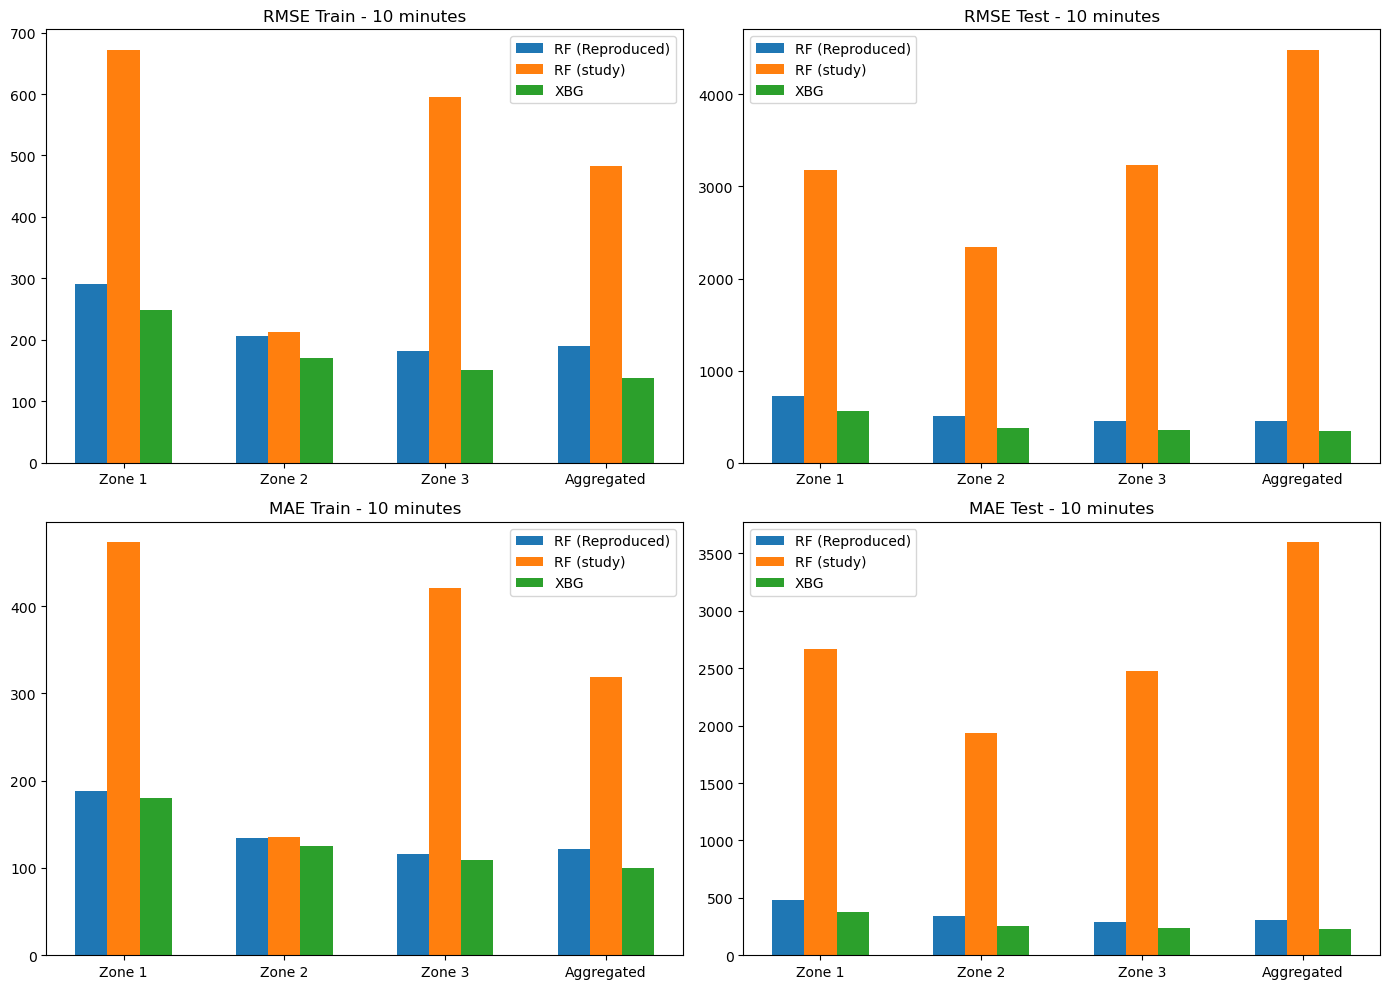

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the provided table
algorithms = ['RF (Reproduced)', 'RF (study)', 'XBG']
zones = ['Zone 1', 'Zone 2', 'Zone 3', 'Aggregated']

# RMSE and MAE values for Train and Test
rmse_train = [
    [291.4, 671.7, 247.8],  # Zone 1
    [206.6, 213.1, 170.7],  # Zone 2
    [181.6, 594.5, 150.5],  # Zone 3
    [190.1, 482.3, 138.0],  # Aggregated
]

rmse_test = [
    [721.7, 3174.7, 557.2],  # Zone 1
    [505.4, 2336.9, 372.8],  # Zone 2
    [448.2, 3227.8, 351.6],  # Zone 3
    [455.4, 4481.1, 340.1],  # Aggregated
]

mae_train = [
    [188.0, 472.8, 180.1],   # Zone 1
    [134.7, 135.6, 125.2],   # Zone 2
    [115.6, 420.5, 109.6],   # Zone 3
    [122.2, 318.5, 100.4],   # Aggregated
]

mae_test = [
    [480.5, 2663.5, 373.2],   # Zone 1
    [341.7, 1939.6, 258.4],   # Zone 2
    [293.1, 2475.9, 237.2],   # Zone 3
    [305.3, 3595.3, 226.0],   # Aggregated
]

x = np.arange(len(zones))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# RMSE Train plot
for i in range(len(algorithms)):
    ax[0, 0].bar(x + (i - 1) * width, [rmse_train[j][i] for j in range(len(zones))], width, label=f'{algorithms[i]}')

ax[0, 0].set_title('RMSE Train - 10 minutes')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(zones)
ax[0, 0].legend()

# RMSE Test plot
for i in range(len(algorithms)):
    ax[0, 1].bar(x + (i - 1) * width, [rmse_test[j][i] for j in range(len(zones))], width, label=f'{algorithms[i]}')

ax[0, 1].set_title('RMSE Test - 10 minutes')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(zones)
ax[0, 1].legend()

# MAE Train plot
for i in range(len(algorithms)):
    ax[1, 0].bar(x + (i - 1) * width, [mae_train[j][i] for j in range(len(zones))], width, label=f'{algorithms[i]}')

ax[1, 0].set_title('MAE Train - 10 minutes')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(zones)
ax[1, 0].legend()

# MAE Test plot
for i in range(len(algorithms)):
    ax[1, 1].bar(x + (i - 1) * width, [mae_test[j][i] for j in range(len(zones))], width, label=f'{algorithms[i]}')

ax[1, 1].set_title('MAE Test - 10 minutes')
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(zones)
ax[1, 1].legend()

plt.tight_layout()
plt.show()

Plotting the RMSE and MAE obtained from the three models we can see the values obtained from the study show underperformance. Overall the Random Forest did perform best in both the study and in this experiment where we replicated their models using the same parameters and data pre-processing.

However we can see that the replicated model outperforms the model from the original study. However the XGBoost is able to outperform the replicated Random Forest model by a small margin. 

It can also be seen that the replicated Random Forest and XGBoost models are able to better predict values for Zone 3 the best followed by Zone 2 given they have smaller RMSE and MAE values, but overall perform quite well across all three zones and for the aggregated prediction.

**Comparison of RMSE and MAE for Random Forest (Reproduced) vs Random Forest (Study) vs GBM with XGBoost - Hourly intervals**

Furthermore we can also plot the error values for the replicated Random Forest, the study Random Forest as well as the XGBoost to compare their performance.


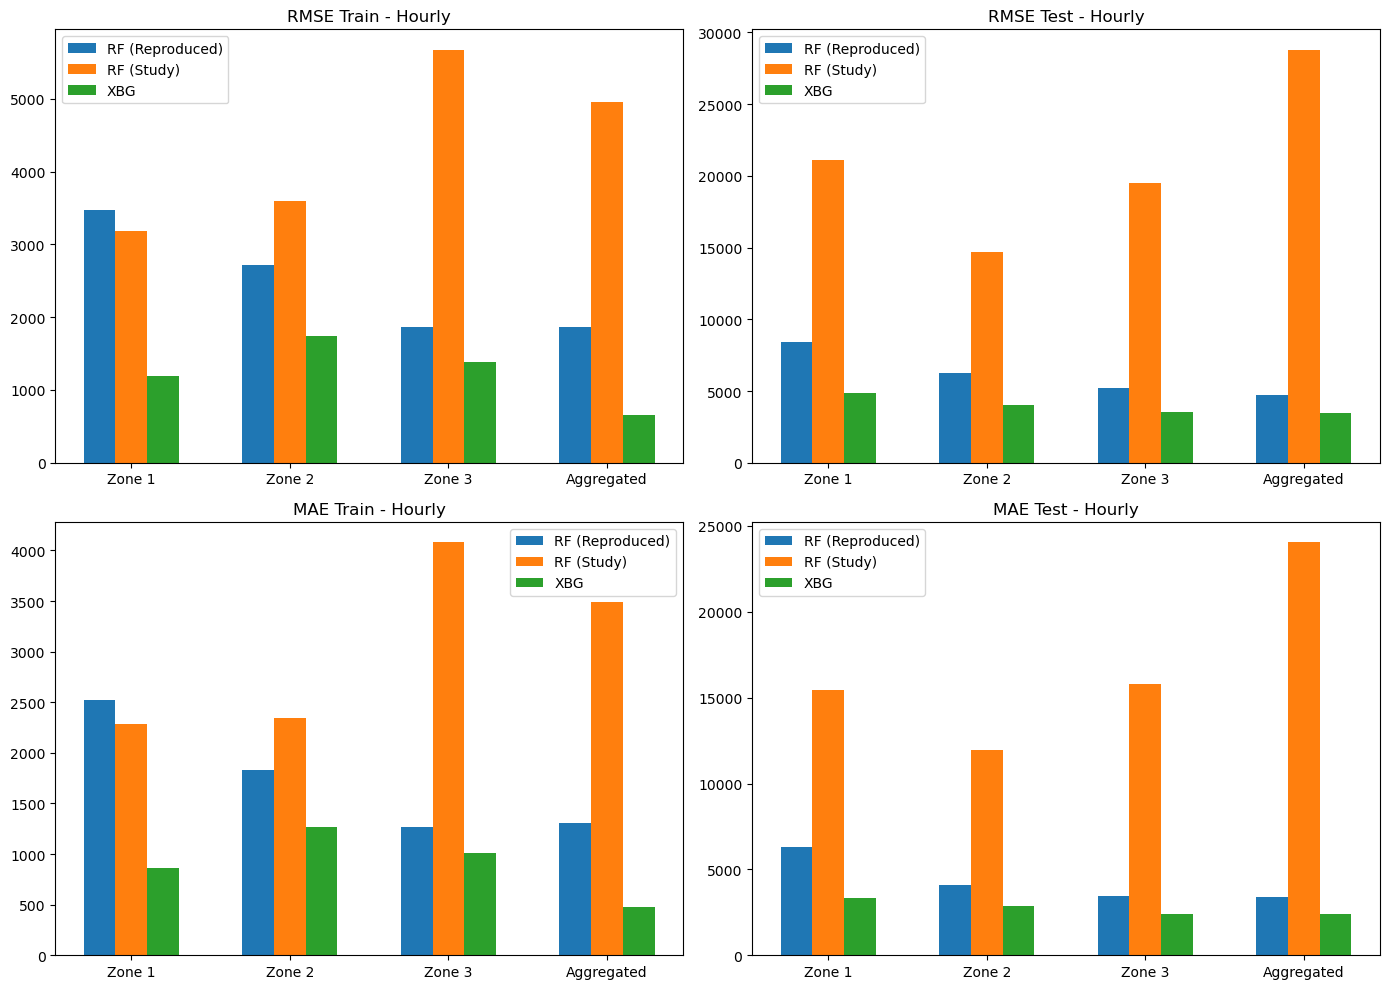

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the provided table
algorithms = ['RF (Reproduced)', 'RF (Study)', 'XBG']
zones = ['Zone 1', 'Zone 2', 'Zone 3', 'Aggregated']

# RMSE and MAE values for Train and Test
rmse_train = [
    [3477.6, 3185.8, 1193.6],  # Zone 1
    [2714.0, 3602.2, 1737.5],  # Zone 2
    [1859.1, 5669.8, 1384.4],  # Zone 3
    [1863.2, 4960.9, 657.7],   # Aggregated
]

rmse_test = [
    [8425.6, 21109.7, 4851.0],  # Zone 1
    [6284.0, 14700.9, 4005.4],  # Zone 2
    [5197.4, 19504.1, 3562.3],  # Zone 3
    [4752.1, 28769.3, 3503.7],  # Aggregated
]

mae_train = [
    [2525.6, 2286.7, 861.3],    # Zone 1
    [1827.3, 2342.3, 1271.7],   # Zone 2
    [1268.2, 4079.2, 1009.6],   # Zone 3
    [1306.0, 3493.7, 480.5],    # Aggregated
]

mae_test = [
    [6284.0, 15442.0, 3329.4],  # Zone 1
    [4077.3, 11955.2, 2873.8],  # Zone 2
    [3452.3, 15777.6, 2410.1],  # Zone 3
    [3390.6, 24033.3, 2380.3],  # Aggregated
]

x = np.arange(len(zones))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# RMSE Train plot
for i in range(len(algorithms)):
    ax[0, 0].bar(x + (i - 1) * width, [rmse_train[j][i] for j in range(len(zones))], width, label=f'{algorithms[i]}')

ax[0, 0].set_title('RMSE Train - Hourly')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(zones)
ax[0, 0].legend()

# RMSE Test plot
for i in range(len(algorithms)):
    ax[0, 1].bar(x + (i - 1) * width, [rmse_test[j][i] for j in range(len(zones))], width, label=f'{algorithms[i]}')

ax[0, 1].set_title('RMSE Test - Hourly')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(zones)
ax[0, 1].legend()

# MAE Train plot
for i in range(len(algorithms)):
    ax[1, 0].bar(x + (i - 1) * width, [mae_train[j][i] for j in range(len(zones))], width, label=f'{algorithms[i]}')

ax[1, 0].set_title('MAE Train - Hourly')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(zones)
ax[1, 0].legend()

# MAE Test plot
for i in range(len(algorithms)):
    ax[1, 1].bar(x + (i - 1) * width, [mae_test[j][i] for j in range(len(zones))], width, label=f'{algorithms[i]}')

ax[1, 1].set_title('MAE Test - Hourly')
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(zones)
ax[1, 1].legend()

plt.tight_layout()
plt.show()


Based on the RMSE and MAE values from the 3 models it we can see a similar pattern of performance where the replicated Random Forest greatly outperforms the original model from the study when it comes to looking at the values from the test set. 

The values obtained from the training set suggests that they were trained similarly given fairly similar error values for Zone 1 and Zone 2, but it appears the replicated model fitted better to the training set values better for Zone 3 and the Aggregated distribution as the original study had a much larger value for RMSE and MAE. 

Overall, similarly to the 10 minute interval models, the replicated Random Forest greatly outperforms the original model from the study and the XBoost outperforms both Random Forest models. 

The variation in the replicated and original models is possibly due to how the original dataset was split into test and training, given the data was split with a 25-75% split for all 3 models, random variation in how the data was split could possibly lead to the variations in how the model was trained. As no random seed was provided it is extremely difficult to replicate the results of the original study exactly however it was expected to get similar results however the large discrepancies in the RMSE and MAE indicate otherwise. 

Overall it can be seen that through changing the classification algorithm and further hyperparameter tuning we can improve the overall ability to make predictions on power consumptions with this given dataset. Both model's good performance on the dataset seems to further suggest that ensemble training methods tend to perform better compared to other classification algorithms. 


Looking at the comparison of the RMSE and MAE error values calculated for both the Random Forest and XGBoost models it can be observed that across both the 10 minute interval and hourly intervals, the XGBoost model was able to outperform the Random Forest model across all three zones and in the aggregated distribution. The performance of the XGBoost model was marginally better than Random Forest in 10 minute interval predictions, but for hourly predictions the XGBoost performed slightly better. Overall it can be seen that through changing the classification algorithm and further hyperparameter tuning we can improve the overall ability to make predictions on power consumptions with this given dataset. Both model's good performance on the dataset seems to further suggest that ensemble training methods tend to perform better when compared to other classification algorithms.

The motive behind using XGBoost was to utilise an ensemble learning method which was already proven to have great results from the original article. Furthermore XGBoost is a widely known algorithm and has shown great success particularly in challenges that have been hosted on Kaggle [1]. [2] has shown in studies that Boosted trees were able to significantly outperform Random Forest, particularly when calibrated appropriately. Furthermore [2] also was able to demonstrate that Random Forests were their second best performing algorithm, this parallels the performance found in this task. XGBoost falls under a boosted tree concept as they are an ensemble of trees created using a boosting technique, further compounding the findings of these studies as our XGBoost model was able to outperform the Random Forest models.

Another study by [3] was also able to demonstrate the superior performance of an XGBoost model over a random forest for classification tasks. They found that both Random Forest and XGBoost both excelled in handling complex relationships between different classes. While this study used these models for classification rather than regression, the authors praise the effectiveness of utilising ensemble training methods in a real world setting. The parallels in these findings in comparison to this task is expected as XGBoost is known for its ability to handle complex data well. Furthermore XGBoost has also been shown to run much faster than many other algorithms, its scalability allows us to run the model through a large variety of different hyperparameters in a grid search for further optimisation as found in [1].

A similar power consumption prediction study by [4] also looked at machine learning models used to forecast power consumption. In this study they used K nearest neighbours (KNN), random forest, artificial neural networks and XGBoost. Similarly this study looked at data covering one year's worth of power consumption in hourly intervals and evaluated with the same metrics (RMSE and MAE) as well as R2 score. Interestingly enough it was found that K nearest neighbours out performed all other models having the greatest R2 score, which was followed closely by Random Forest then XGBoost with least performing models being Linear Regression and SVR. Overall the similar performance of KNN, Random Forest and XGBoost with similar features indicates these model's robust ability to perform regression tasks in a similar setting. While KNN was not explored in this task, it would be interesting to observe how a KNN model would fare with this dataset to see if its performance paralleled those found in [4].

[5] used similar algorithms to this task (Random Forest, XGBoost and Linear Regression) to perform electrical power forecasting and was able to demonstrate similar results to this task. Finding that Random Forest was able to perform the best similar to the original study this task was based on by [6]. [7] also utilised Random Forest, XGBoost and Linear regression to find very similar results to this task. It was found that linear regression performed the most poorly while Random Forest and XGBoost had very similar performance with XGBoost only slightly outperforming Random Forest when using squared error as a performance metric.
Overall it appears that ensemble training models such as Random Forest and XGBoost are able to perform well in regression tasks that involve power consumption with the exception of [4] who was able to demonstrate that KNN was a better performing model in a similar context, while other models like Linear Regression tended to perform subpar in comparison. The variation in model performance across similar and different datasets is a testament to the concept that there is no perfect machine learning model for every situation and that multiple models should be trialled and compared to determine which model can perform the best on the given dataset. It can be observed in this task however the importance of hyperparameter tuning in order to optimise each model to its maximum capacity. Subsequently it appears that the ability to utilise an ensemble learning method results in better predictions with this particular dataset as both the Random Forest and XGBoost models were the highest performing out of all models trained in this study. When comparing ensemble training methods the ability to use a further optimised gradient boosting machine in the form of XGBoosting resulted in greater performance. It appears that XGBoost's access to more hyperparameters allows for even greater tuning of the model resulting in the lower RMSE and MAE scores. This suggests that the ability to have greater control of hyperparameter tuning can lead to better prediction ability of the model with this dataset as Random Forest has fewer hyperparameters to tune in comparison. However using a different dataset with similar architecture could possibly result in different performance as different models are able to better understand the nuances and relationships of the underlying data at different levels.

## References

[1] T. Chen and C. Guestrin. (2016). "XGBoost: A Scalable Tree Boosting System," IEEE Transactions on Knowledge and Data Engineering, vol. 28, no. 9, pp. 785-799, Sept. 2016, doi: 10.1109/TKDE.2016.2581920.

[2] R. Caruana and A. Niculescu-Mizil. (2006) ‘An empirical comparison of supervised learning algorithms’, Proceedings of the 23rd international conference on Machine learning  - ICML ’06 [Preprint]. doi:10.1145/1143844.1143865. 

[3] Z. Shao, M. N. Ahmad, and A. Javed, "Comparison of Random Forest and XGBoost classifiers using integrated optical and SAR features for mapping urban impervious surface," Remote Sens., vol. 16, no. 4, p. 665, 2024.doi:10.3390/rs16040665. 

[4] G. Vijendar Reddy, et al. (2023) “Electricity consumption prediction using machine learning’, E3S Web of Conferences 391, 01048. doi:10.1051/e3sconf/202339101048..

[5] M. Abumohsen, et al. (2023) ‘Electrical Load Forecasting Based on Random Forest, XGBoost, and Linear Regression Algorithms’, 2023 International Conference on Information Technology (ICIT). doi: 10.1109/ICIT58056.2023.10225968.

[6] A. Salam and A. E. Hibaoui, "Comparison of machine learning algorithms for the power consumption prediction: Case study of Tetouan city," in Proc. Int. Renewable Energy Congr. (IRSEC), Dec. 2018, pp. 1-6, doi: 10.1109/IRSEC.2018.8703007.

[7] M. Gokce, E. Duman (2022) ‘Performance Comparison of Simple Regression, Random Forest and XGBoost Algorithms for Forecasting Electricity Demand’,  2022 3rd International Informatics and Software Engineering Conference. doi: 10.1109/IISEC56263.2022.9998213.